In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx.algorithms.centrality as centrality
import networkx.algorithms.shortest_paths.generic as nxpath 
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure

In [ ]:
sides = {}
episodes_homo = []

In [ ]:
def draw(G, pos, measures, measure_name):
    figure(figsize=(20, 15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos, font_size=8)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [ ]:
def homo(edges):
  global episodes_homo
  no_edges = len(edges)
  expected = no_edges//2
  real = 0
  for x in edges:
    source = x[0]
    target = x[1]
    side1 = sides[source]
    side2 = sides[target]
    if side1!=side2:
      real+=1 
  homophily = real / expected
  episodes_homo.append(homophily)

In [ ]:
def get_sides():
    return {
      "R2-D2": "1",
      "CHEWBACCA": "1",
      "BB-8": "1",
      "QUI-GON": "1",
      "NUTE GUNRAY": "2",
      "PK-4": "1",
      "TC-14": "1",
      "OBI-WAN": "1",
      "DOFINE": "2",
      "RUNE": "2",
      "TEY HOW": "2",
      "EMPEROR": "2",
      "CAPTAIN PANAKA": "1",
      "SIO BIBBLE": "1",
      "JAR JAR": "1",
      "TARPALS": "2",
      "BOSS NASS": "2",
      "PADME": "1",
      "RIC OLIE": "1",
      "WATTO": "2",
      "ANAKIN": "1",
      "SEBULBA": "1",
      "JIRA": "1",
      "SHMI": "1",
      "C-3PO": "1",
      "DARTH MAUL": "2",
      "KITSTER": "1",
      "WALD": "1",
      "FODE/BEED": "1",
      "JABBA": "1",
      "GREEDO": "2",
      "VALORUM": "2",
      "MACE WINDU": "1",
      "KI-ADI-MUNDI": "1",
      "YODA": "1",
      "RABE": "2",
      "BAIL ORGANA": "1",
      "GENERAL CEEL": "1",
      "BRAVO TWO": "1",
      "BRAVO THREE": "1",
      "CAPTAIN TYPHO": "1",
      "SENATOR ASK AAK": "2",
      "ORN FREE TAA": "2",
      "SOLA": "1",
      "JOBAL": "1",
      "RUWEE": "1",
      "TAUN WE": "1",
      "LAMA SU": "1",
      "BOBA FETT": "2",
      "JANGO FETT": "2",
      "OWEN": "1",
      "BERU": "1",
      "CLIEGG": "1",
      "COUNT DOOKU": "2",
      "SUN RIT": "2",
      "POGGLE": "2",
      "PLO KOON": "1",
      "ODD BALL": "1",
      "GENERAL GRIEVOUS": "2",
      "FANG ZAR": "1",
      "MON MOTHMA": "1",
      "GIDDEAN DANU": "1",
      "CLONE COMMANDER GREE": "1",
      "CLONE COMMANDER CODY": "1",
      "TION MEDON": "1",
      "CAPTAIN ANTILLES": "1",
      "DARTH VADER": "2",
      "LUKE": "1",
      "CAMIE": "1",
      "BIGGS": "1",
      "LEIA": "1",
      "MOTTI": "2",
      "TARKIN": "2",
      "HAN": "1",
      "DODONNA": "1",
      "GOLD LEADER": "1",
      "WEDGE": "1",
      "RED LEADER": "1",
      "RED TEN": "1",
      "GOLD FIVE": "1",
      "RIEEKAN": "1",
      "DERLIN": "1",
      "ZEV": "1",
      "PIETT": "2",
      "OZZEL": "2",
      "DACK": "1",
      "JANSON": "1",
      "NEEDA": "1",
      "LANDO": "1",
      "JERJERROD": "2",
      "BIB FORTUNA": "2",
      "BOUSHH": "1",
      "ADMIRAL ACKBAR": "1",
      "LOR SAN TEKKA": "1",
      "POE": "1",
      "KYLO REN": "2",
      "CAPTAIN PHASMA": "2",
      "FINN": "1",
      "UNKAR PLUTT": "1",
      "REY": "1",
      "GENERAL HUX": "2",
      "LIEUTENANT MITAKA": "1",
      "BALA-TIK": "1",
      "SNOKE": "2",
      "MAZ": "1",
      "SNAP": "1",
      "ADMIRAL STATURA": "1",
      "YOLO ZIFF": "1",
      "COLONEL DATOO": "1",
      "ELLO ASTY": "1",
      "JESS": "1",
      "NIV LEK": "1"
}

In [ ]:
# G Start
def get_value(name, maps):
    for nodes in maps:
        if nodes["name"] == name:
            return nodes["value"]
        
def sort(hashmap):
    return sorted(hashmap.items(), key = lambda x: x[1])[::-1]

def get_info(data):
    connections = defaultdict(int)
    interactions = defaultdict(int)
    for link in data["links"]:
        connections[data["nodes"][link["source"]]["name"]] += 1
        connections[data["nodes"][link["target"]]["name"]] += 1
        interactions[data["nodes"][link["source"]]["name"]] += link["value"]
        interactions[data["nodes"][link["target"]]["name"]] += link["value"]
    return connections, interactions
   
def get_graph(data, episode):
    nodes = [ node['name'] for node in data["nodes"] ]
    edges = [ (nodes[link['source']], nodes[link['target']]) for link in data["links"] ]
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    
    #print(edges)
    homo(edges)
#     Uncomment block for graph visualization

    plt.figure(figsize=(30,15))
    plt.subplot(121)
    nx.draw(G, with_labels=True)
    plt.savefig(f'task4_results/graphs/Episode_{episode}_Graph.png')
    plt.show()
    plt.close()
    
    print("\n")

    pos = nx.spring_layout(G, seed=675)
    draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
    print("\n")
    draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
    print("\n")
    draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
    print("\n")
    
    return G

In [ ]:
def get_homophily(data, characters):
    sides = []
    for side in characters.values():
        arr = []
        for count in range(len(data["nodes"])):
            if data["nodes"][count]["name"] in side:
                arr.append(count)
        sides.append(arr)
    
    homophily = []
    for side in sides:
        interacts = defaultdict(int)
        for link in data["links"]:
            if link["source"] in side:
                interacts[data["nodes"][link["target"]]["name"]] += link["value"]
                interacts[data["nodes"][link["source"]]["name"]] += link["value"]
            elif link["target"] in side:
                interacts[data["nodes"][link["source"]]["name"]] += link["value"]
                interacts[data["nodes"][link["target"]]["name"]] += link["value"]
        homophily.append(sorted(interacts.items(), key = lambda x: x[1])[::-1][:10])
    return homophily

# G End

# D Start
                
def light_dark_classification(data, sides):
    light_side = []
    dark_side = []
    for i,j in sides.items():
        if j == '1':
            light_side.append(i)
        else:
            dark_side.append(i)

    sides = []
    for side in [light_side, dark_side]:
        arr = []
        for count in range(len(data["nodes"])):
            if data["nodes"][count]["name"] in side:
                arr.append(count)
        sides.append(arr)

    good = defaultdict(int)
    bad = defaultdict(int)
    for character in sides[0]:
        for link in data["links"]:
            if (link["source"] == character and link["target"] in sides[0]) or (link["target"] == character and link["source"] in sides[0]):
                good[data["nodes"][character]["name"]] += link["value"]/len(sides[0])  
            elif (link["source"] == character and link["target"] in sides[1]) or (link["target"] == character and link["source"] in sides[1]):
                bad[data["nodes"][character]["name"]] += link["value"]/len(sides[1])

    for elem in good.keys():
        if elem not in bad.keys():
            bad[elem] = 0

    for elem in bad.keys():
        if elem not in good.keys():
            good[elem] = 0

    correct = 0
    incorrect = 0
    for l, d in zip(sorted(good.items()), sorted(bad.items())):
        if l[1] >= d[1]:
            if l[0] in light_side:
                correct += 1
            else:
                incorrect += 1
        else:
            if d[0] in dark_side:
                correct += 1
            else:
                incorrect += 1

    return (correct, incorrect)

Eigen vector code

In [ ]:
def loop(episode, feature):
    global sides 
    e = "episode-" + str(episode)
    
    if episode == 0:
        e = "full"
       # /content/drive/MyDrive/SIN/Data/starwars-episode-1-interactions-allCharacters.json
    
    with open(f'/content/drive/MyDrive/SIN/Data/starwars-{e}-{feature}.json') as f:
        data = json.load(f)
        
    sides = get_sides()

    #print(sides)
    characters = {
        "Light Side": ["FINN", "OBI-WAN", "YODA", "PADME", "LUKE"], 
        "Dark Side": ["EMPEROR","DARTH VADER", "PIETT", "GENERAL HUX", "NUTE GUNRAY"]
    }    
    
    probability = 0.7
    
#     Task 2 Hypothesis 1
    connections, interractions = get_info(data)
    homophily = get_homophily(data, characters)
    classification = light_dark_classification(data, sides)
    
    Graph  = get_graph(data, episode)
    
    #     Task 2 Hypothesis 2
    betweenness = sort(centrality.betweenness_centrality(Graph))[:5] + sort(centrality.betweenness_centrality(Graph))[-5:]
    degree_centrality = sort(nx.degree_centrality(Graph))[:5] + sort(nx.degree_centrality(Graph))[-5:]

    # D END 

    # S Start

    #     Task 3
    cliquishness = sort(nx.clustering(Graph))[:5] + sort(nx.clustering(Graph))[-5:]
    path_length = list(nxpath.shortest_path_length(Graph))
    randomness = get_randomness(Graph, probability)
    
#     Uncomment to display randomness graphs and save them
    for graph in range(1, len(randomness[0]), 10):
        plt.figure(figsize=(30,15))
        plt.subplot(121)
        nx.draw(randomness[0][graph], with_labels=True)
        plt.savefig(f'task3_results/Episode{episode}_{graph}.png')
       # plt.show()
        plt.close()
        
#     Task 4, 5
    temp = set()
 
    for i,j in zip(connections.items(), interractions.items()):
        temp.add((i[0], i[1], j[1], get_value(i[0], data["nodes"])))
    temp = sorted(temp, key = lambda x: x[1])[::-1]

#
   
    
#     Interaction Graph

    plt.figure(figsize=(25,10))
    plt.title(f'Episode-{episode} {feature}')
    plt.plot(list(zip(*temp))[0], list(zip(*temp))[1], list(zip(*temp))[0], list(zip(*temp))[2], list(zip(*temp))[0], list(zip(*temp))[3])
    plt.xticks(list(zip(*temp))[0][::1],  rotation='vertical')
    plt.savefig(f'task4_results/images/Episode_{episode}_{feature}.png')
    plt.show()
    plt.close()

    print("\n ### Centrality Measures ###")
    print(f"\n Eigen Vector Centrality ")
    centrality1 = sort(nx.eigenvector_centrality(Graph))[:6] + sort(nx.eigenvector_centrality(Graph))[-6:]
    #print(['%s %0.2f'%(node,centrality1[node]) for node in centrality1])
    print(f"{centrality1}")       

    c= sort(nx.closeness_centrality(Graph))[:6] + sort(nx.closeness_centrality(Graph))[-6:]
    print("\n Closeness Centrality\n")
    #print(c)
    print(f"{c}")

    ########################
    numOfNeighbors = {}

    for node in Graph.nodes():
        count = 0
        for i in Graph.neighbors(node):
            count += 1
        numOfNeighbors.update({node: count})

    #print list of 5 weakest nodes
    print("\n===>List of 5 weakest nodes")
    listofTuples = sorted(numOfNeighbors.items() , reverse=False, key=lambda x: x[1])
    for i in range(0,5):
        print(listofTuples[i][0] , ":" , listofTuples[i][1] )  

    #############################       
    numOfNeighbors = {}

    for node in Graph.nodes():
        count = 0
        for i in Graph.neighbors(node):
            count += 1
        numOfNeighbors.update({node: count})

    print("\n===>List of 5 strongest nodes")
    #print list of 5 strongest nodes
    listofTuples = sorted(numOfNeighbors.items() , reverse=True, key=lambda x: x[1])
    for i in range(0,5):
        print(listofTuples[i][0] , ":" , listofTuples[i][1] )

    ###############################

    return (homophily, classification), (betweenness, degree_centrality), (cliquishness, path_length, randomness[1]), (connections, interractions)

In [ ]:
# S End

def get_randomness(G, p):
    G.remove_nodes_from(list(nx.isolates(G)))
    spread = []
    spread_paths = []
    for j in range(1, len(list(G))):
        spread.append(G)
        spread_paths.append(nx.average_shortest_path_length(G))
        if random.randint(0, 100) < p*100:
            edges = list(set(G.edges) - set(nx.bridges(G)))
            if edges:
                u, v = random.choice(edges)
                G.remove_edge(u, v)
                w = random.choice(list(set(G) - set(x for _,x in set(G.edges(u))))) 
                G.add_edge(u, w)
    return spread, spread_paths


###############################################################
Episode no  0
###############################################################


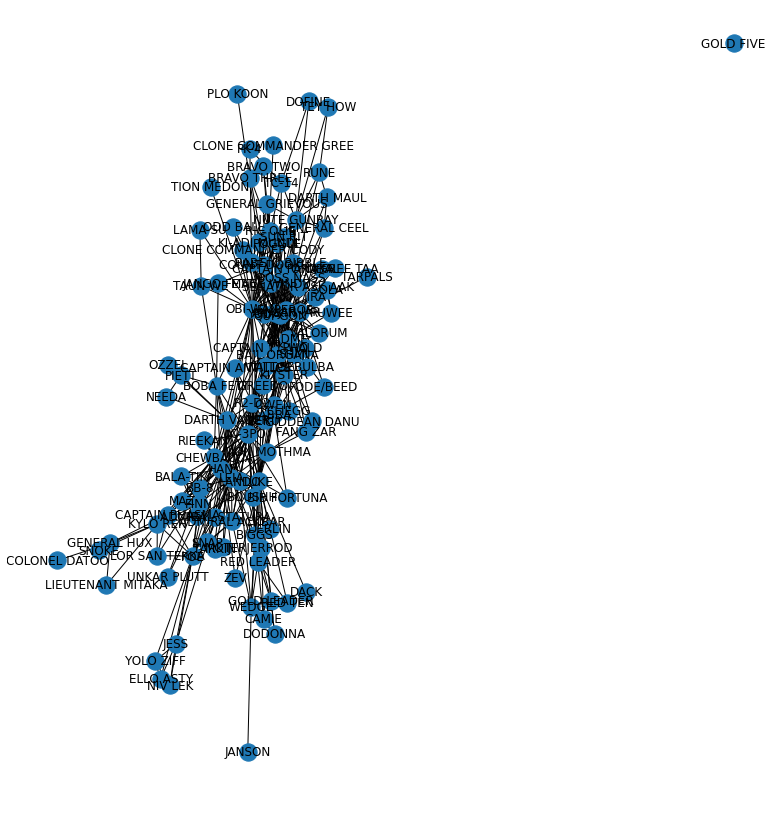

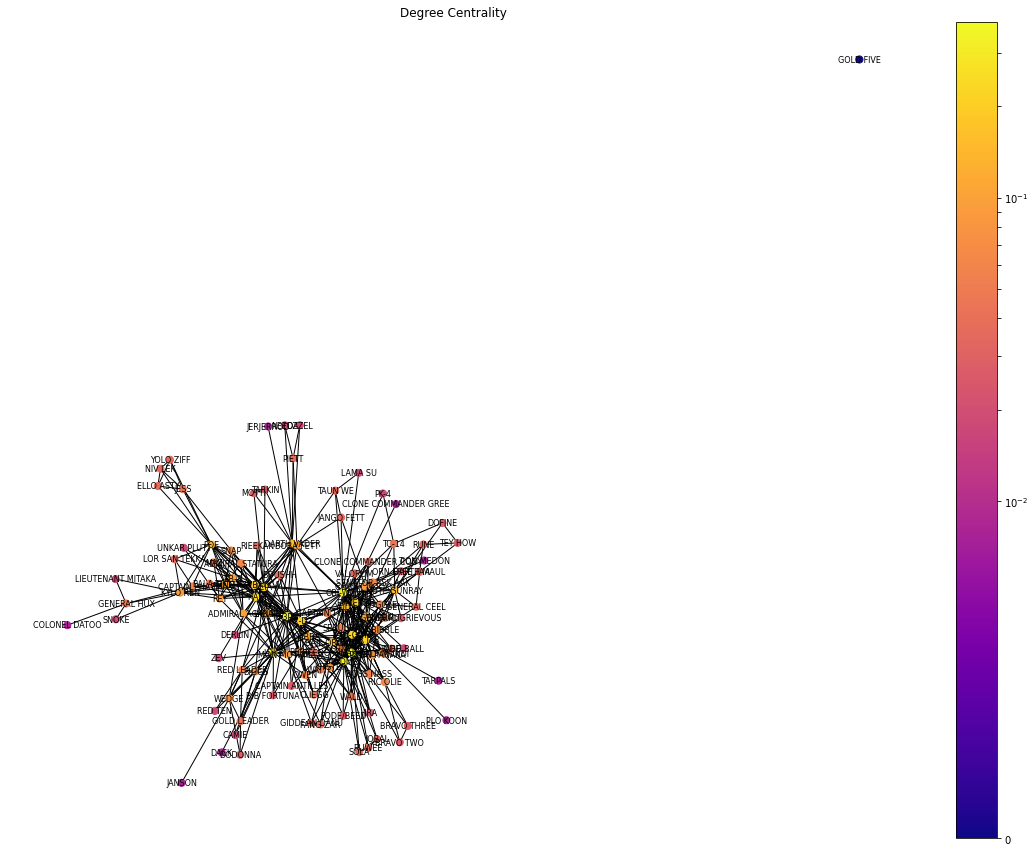

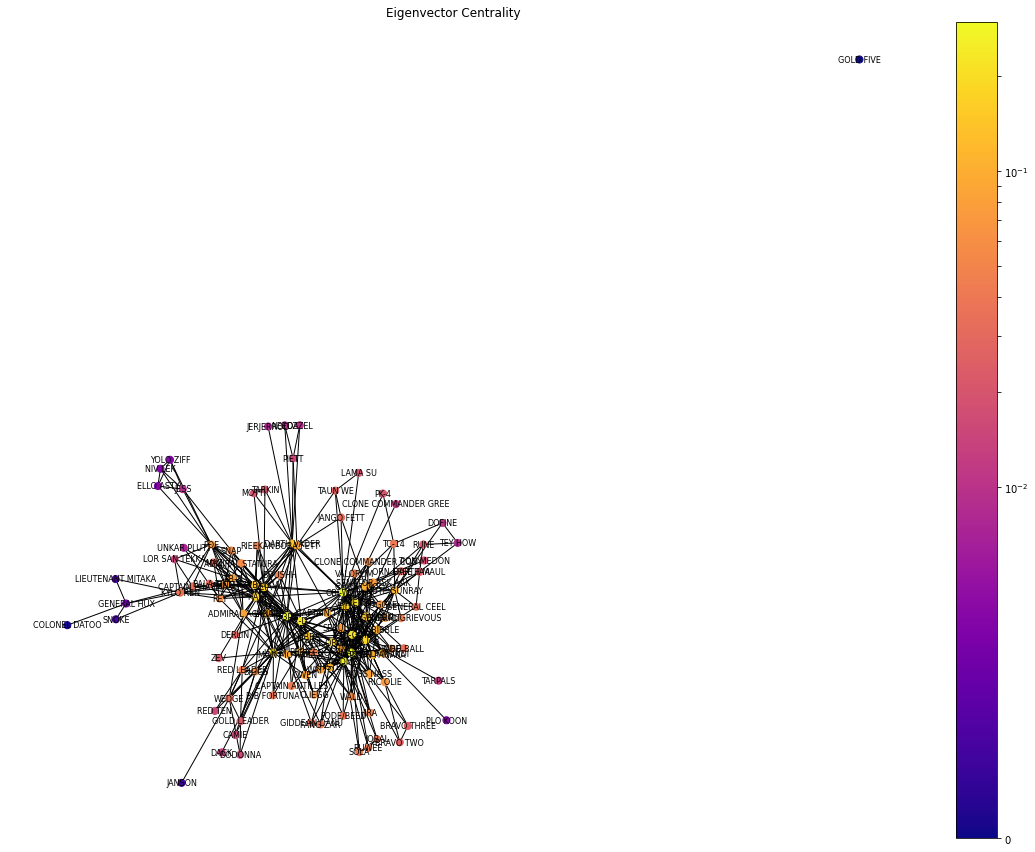

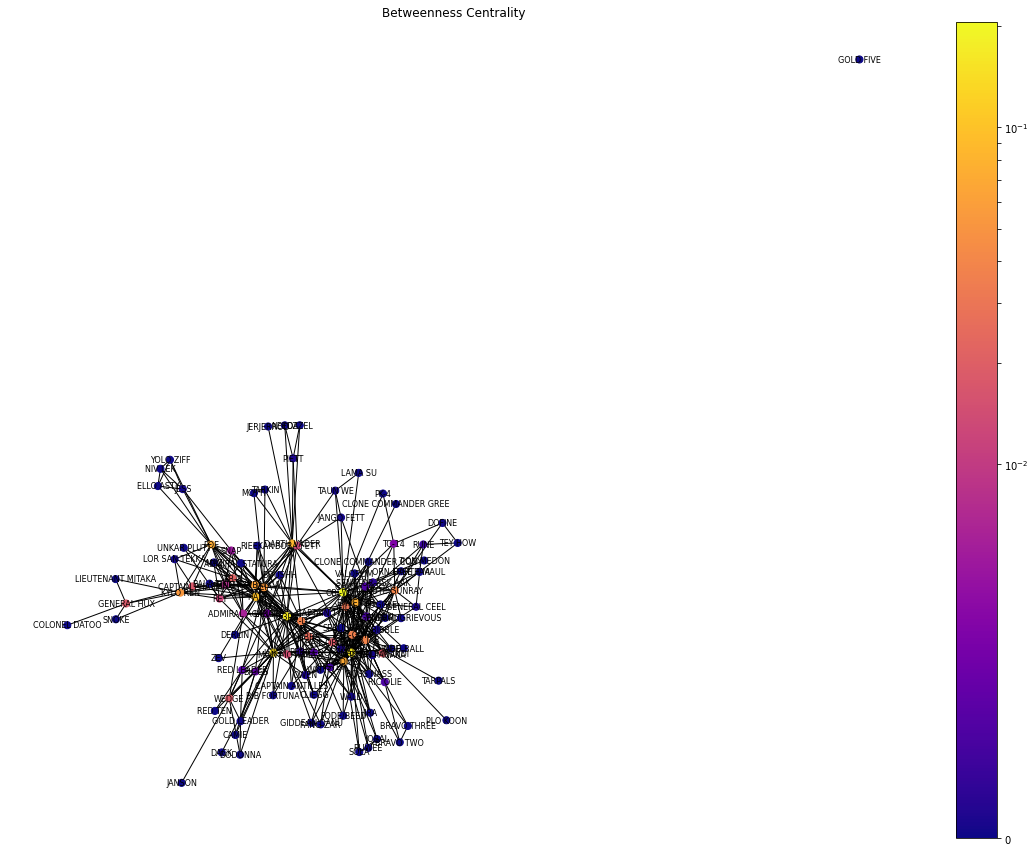

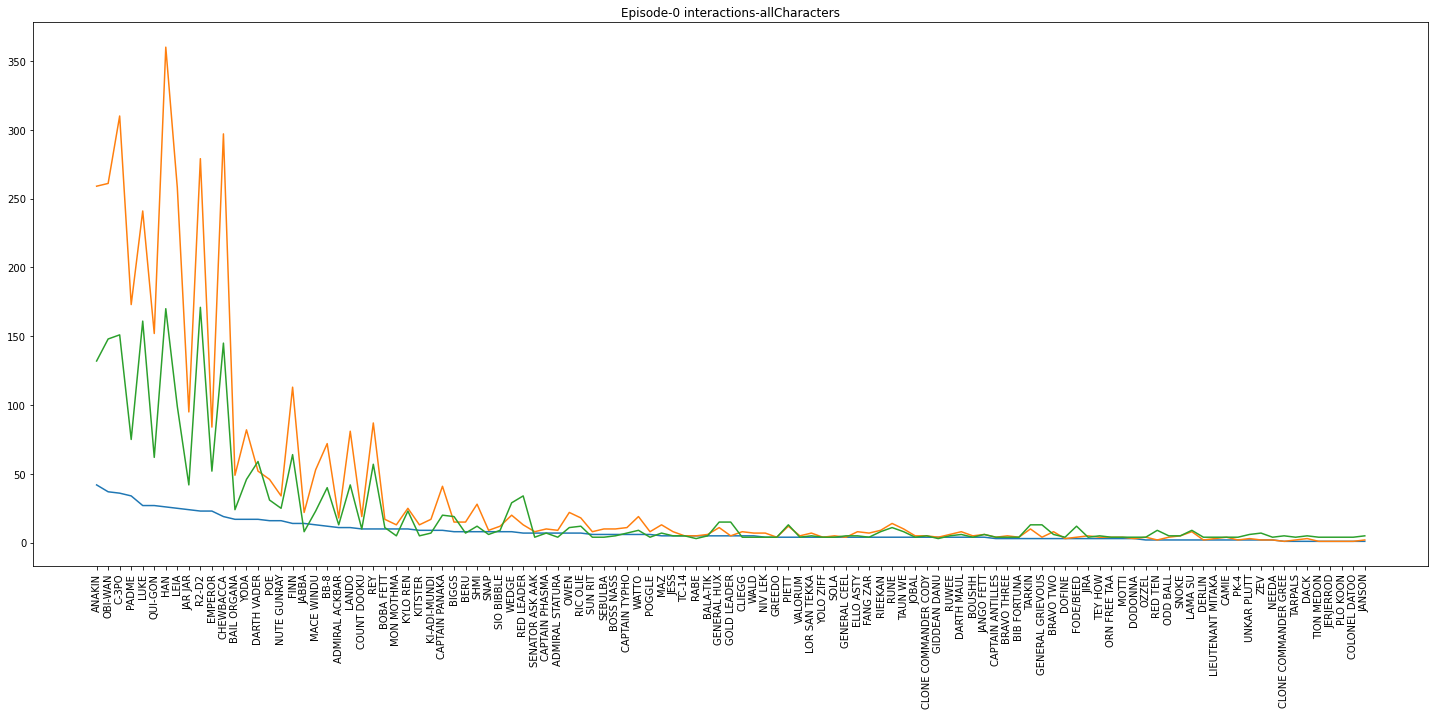


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('ANAKIN', 0.3032077378669413), ('C-3PO', 0.2763899168622978), ('PADME', 0.2732904416974536), ('OBI-WAN', 0.2649212129743548), ('QUI-GON', 0.2359978241823043), ('EMPEROR', 0.2190819366423518), ('OZZEL', 0.00848027042504273), ('PLO KOON', 0.0064251269084201505), ('PK-4', 0.0035701477057580124), ('JANSON', 0.001932582740271714), ('COLONEL DATOO', 0.0012965757397824982), ('NEEDA', 0.0010084929362456053)]

 Closeness Centrality

[('ANAKIN', 0.5978260869565217), ('OBI-WAN', 0.5729166666666666), ('C-3PO', 0.5583756345177665), ('PADME', 0.5555555555555556), ('LUKE', 0.5365853658536586), ('EMPEROR', 0.5365853658536586), ('BRAVO THREE', 0.311614730878187), ('PLO KOON', 0.30726256983240224), ('PK-4', 0.2842377260981912), ('JANSON', 0.2743142144638404), ('COLONEL DATOO', 0.26128266033254155), ('NEEDA', 0.2570093457943925)]

===>List of 5 weakest nodes
ORN FREE TAA : 1
PLO KOON : 1
DACK : 1
JANSON : 1
NEEDA : 1

===>List of 5 strongest node

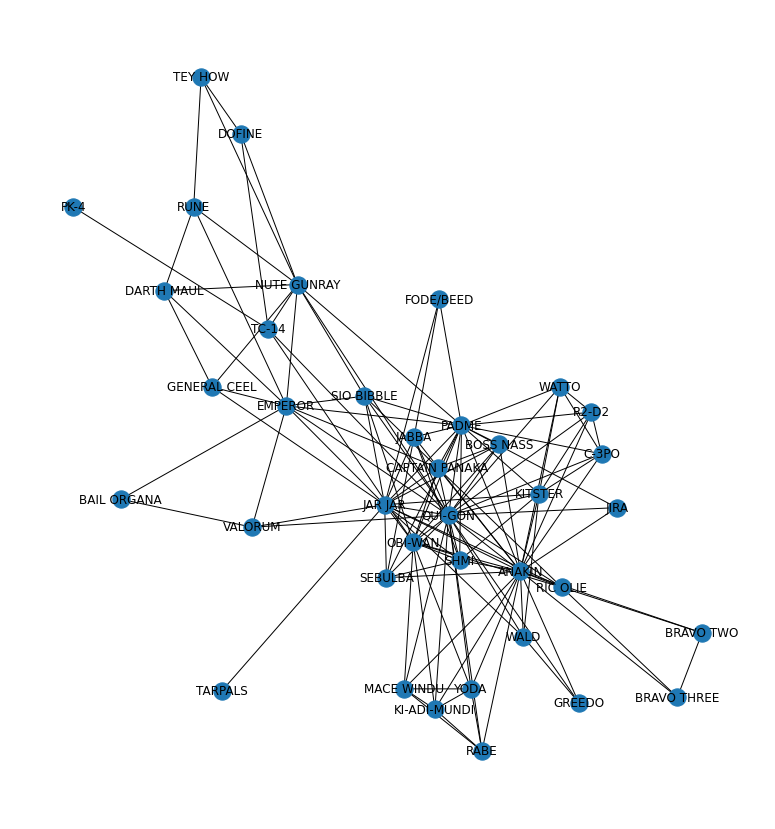

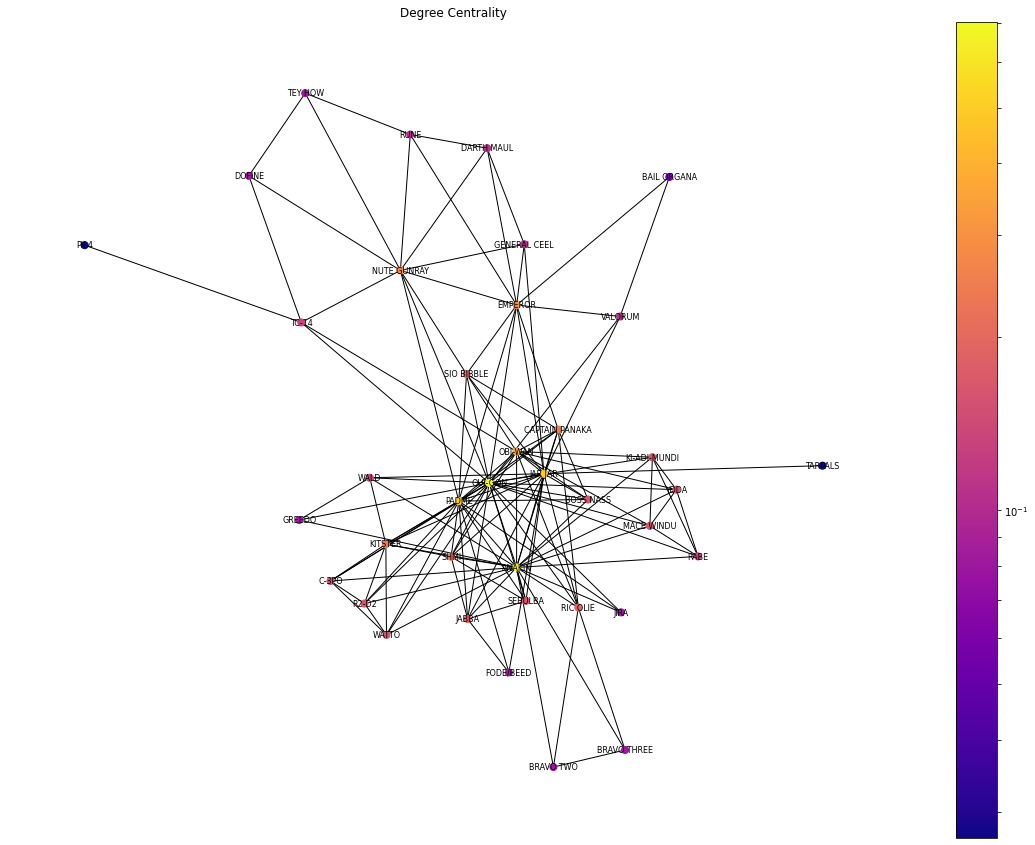

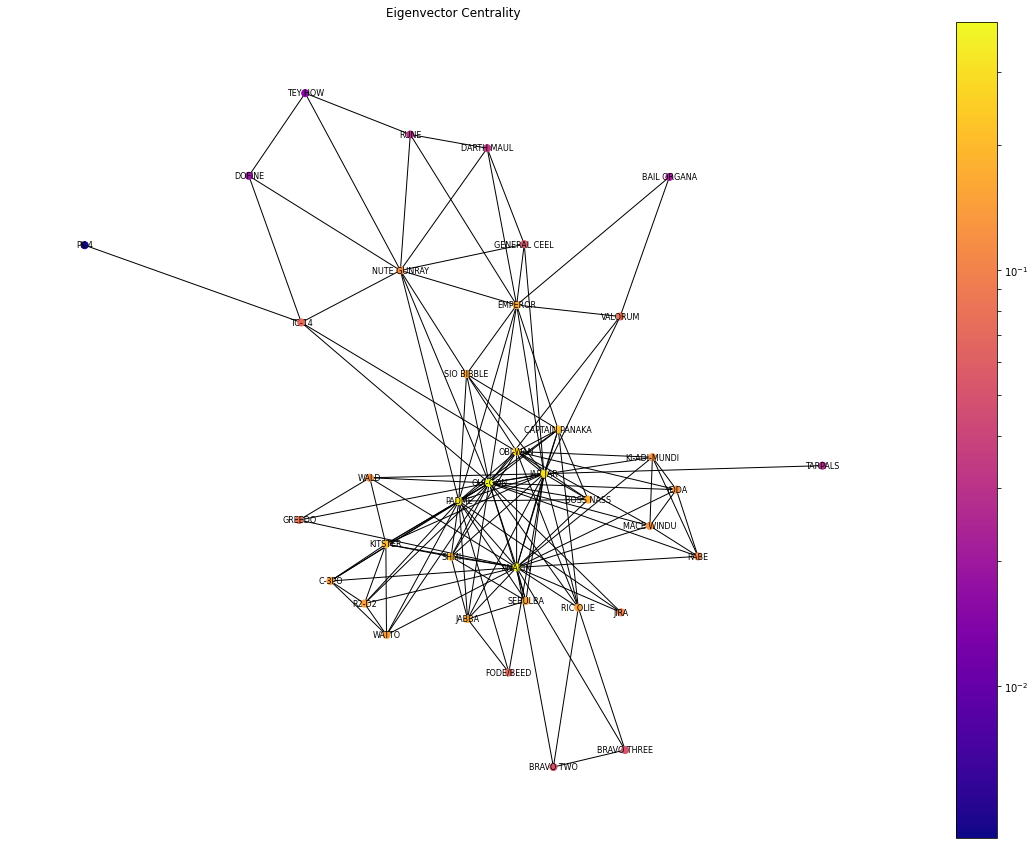

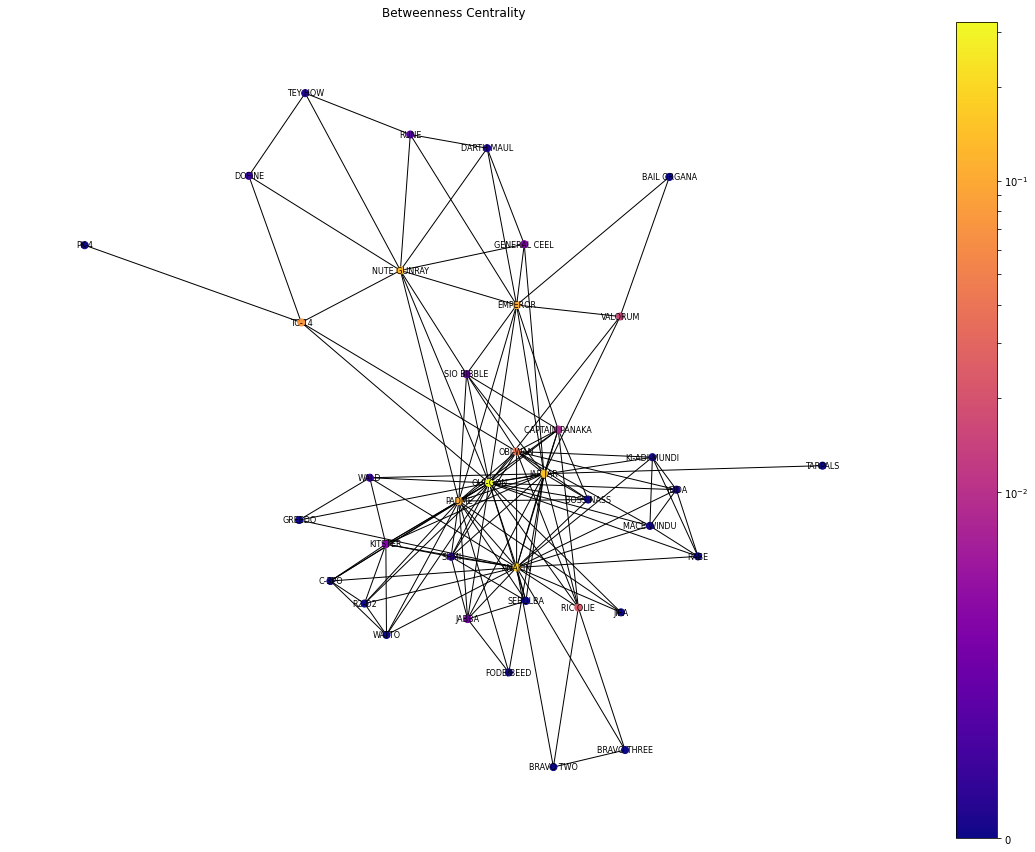

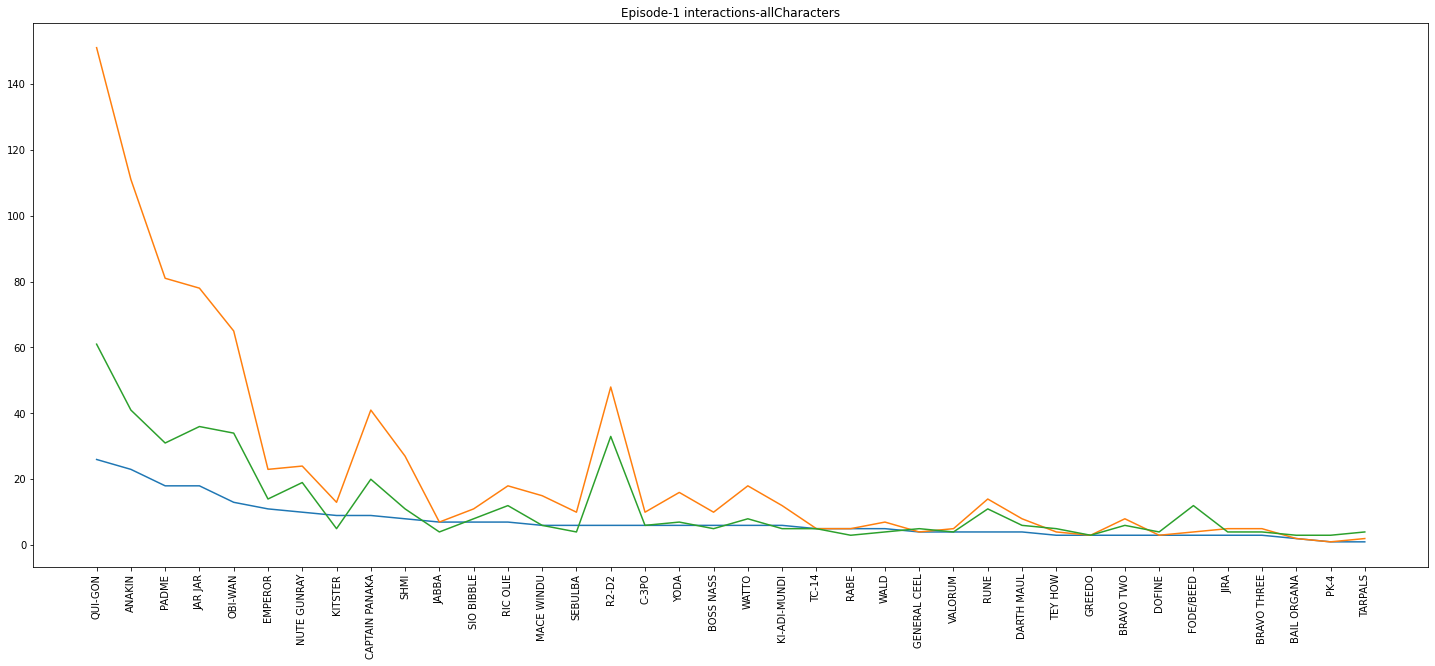


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('QUI-GON', 0.40761062020324973), ('ANAKIN', 0.31343058063899554), ('JAR JAR', 0.29514126183156897), ('PADME', 0.292784634127321), ('OBI-WAN', 0.2650640157762201), ('KITSTER', 0.22454602930908169), ('RUNE', 0.05178426501228546), ('BRAVO THREE', 0.04666253426177915), ('BRAVO TWO', 0.04666253426177915), ('DOFINE', 0.036398132592284055), ('TARPALS', 0.02840529480737265), ('BAIL ORGANA', 0.014135930121369007)]

 Closeness Centrality

[('QUI-GON', 0.7708333333333334), ('JAR JAR', 0.6607142857142857), ('ANAKIN', 0.6379310344827587), ('PADME', 0.6271186440677966), ('OBI-WAN', 0.6065573770491803), ('NUTE GUNRAY', 0.578125), ('BRAVO THREE', 0.4157303370786517), ('BRAVO TWO', 0.4157303370786517), ('TARPALS', 0.40217391304347827), ('RUNE', 0.40217391304347827), ('DOFINE', 0.3894736842105263), ('BAIL ORGANA', 0.36633663366336633)]

===>List of 5 weakest nodes
TARPALS : 1
BAIL ORGANA : 1
DOFINE : 3
FODE/BEED : 3
GREEDO : 3

===>List of 5 str

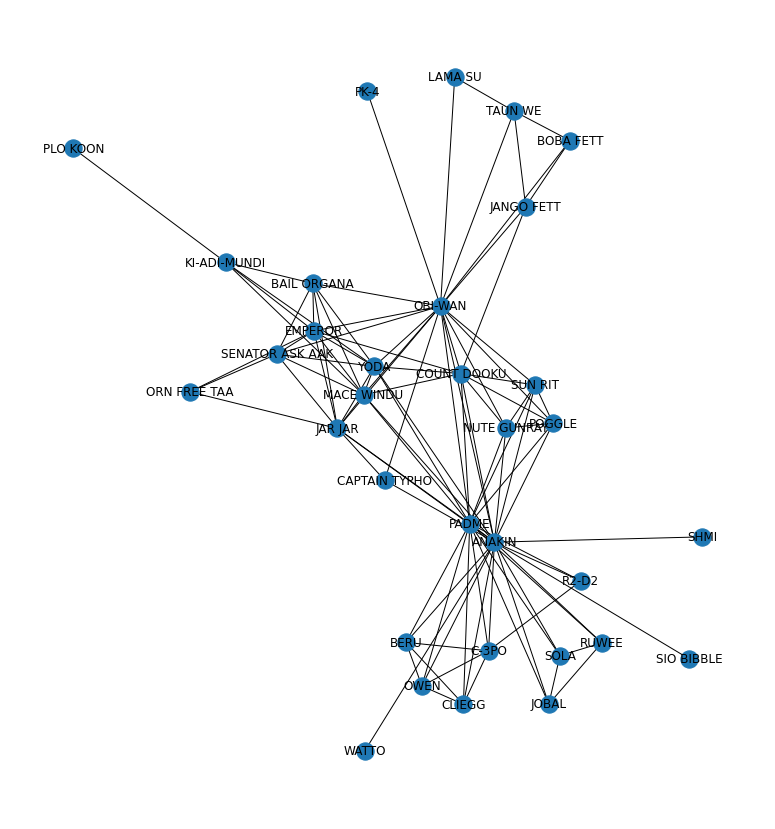

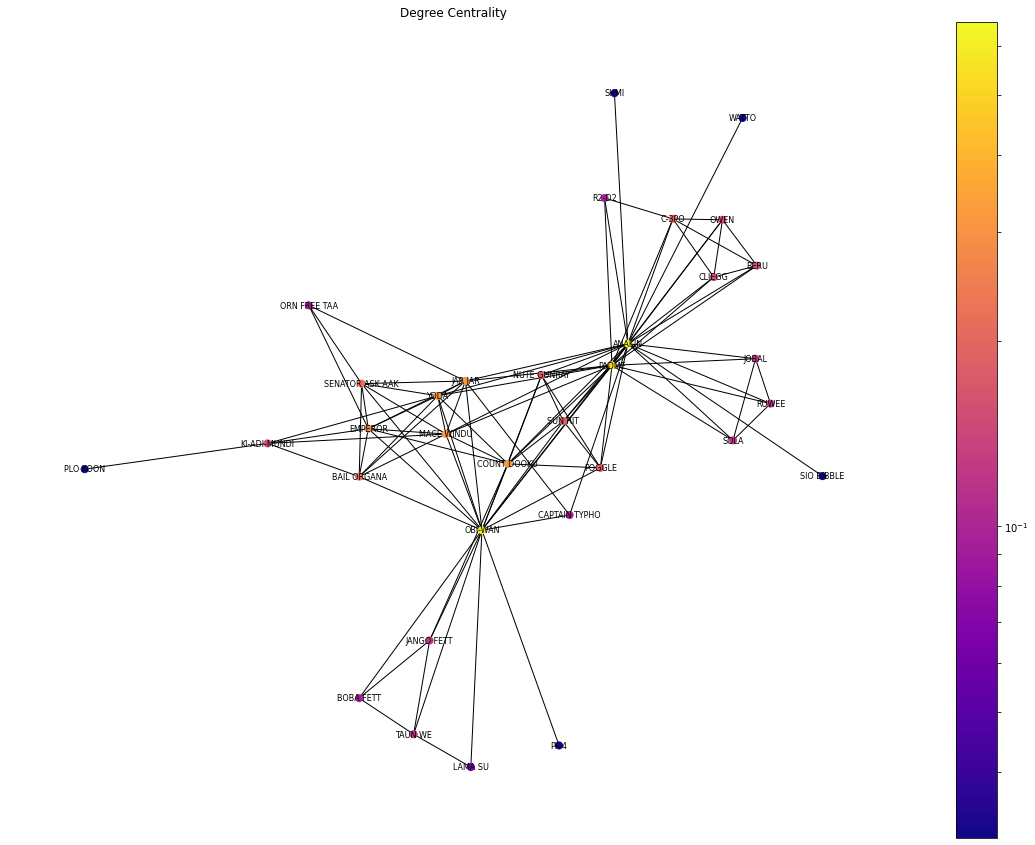

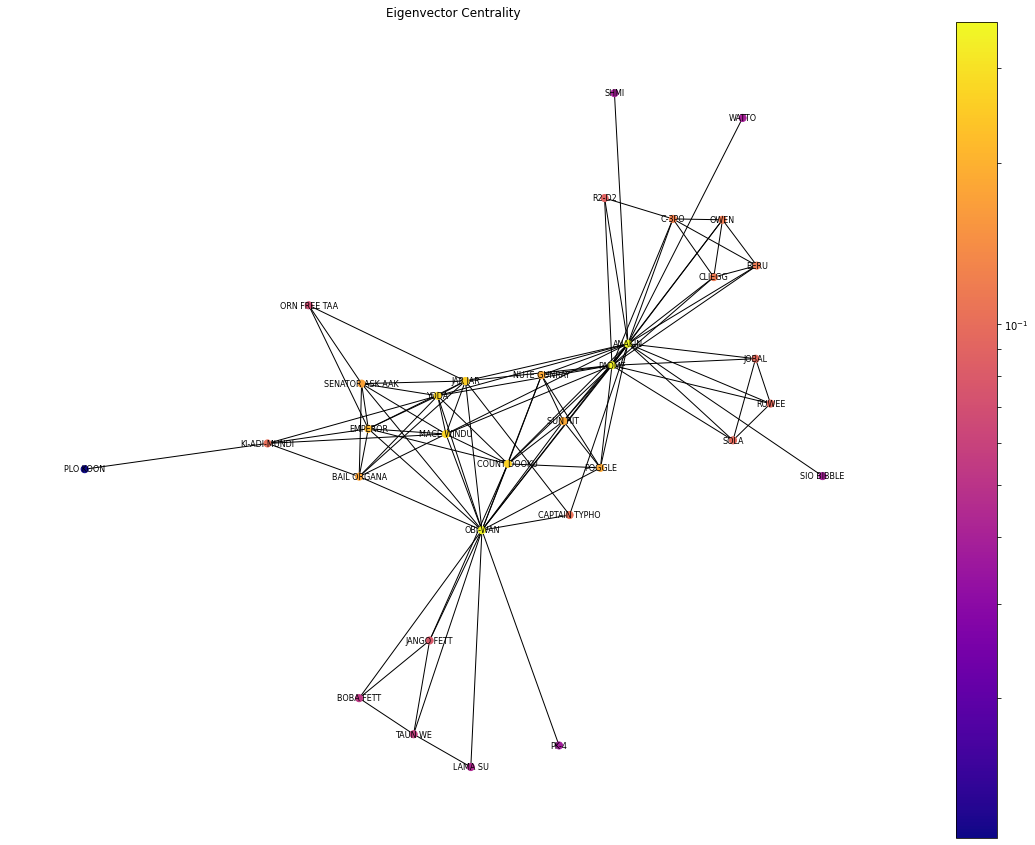

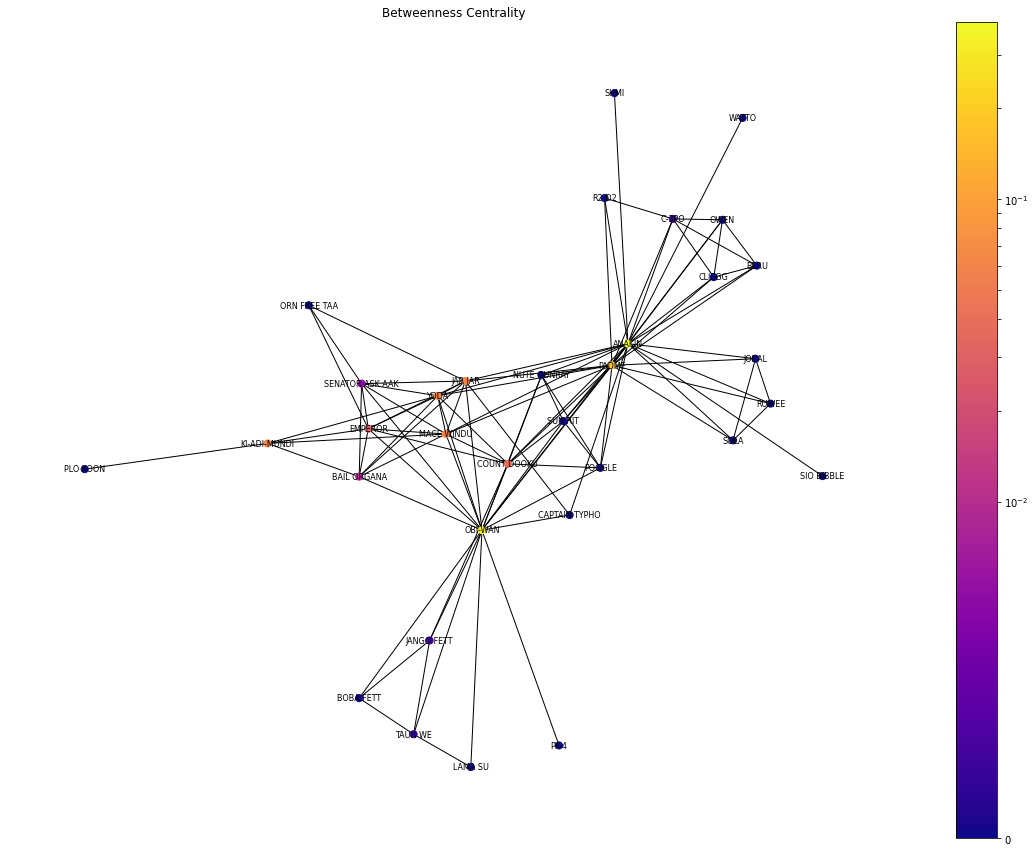

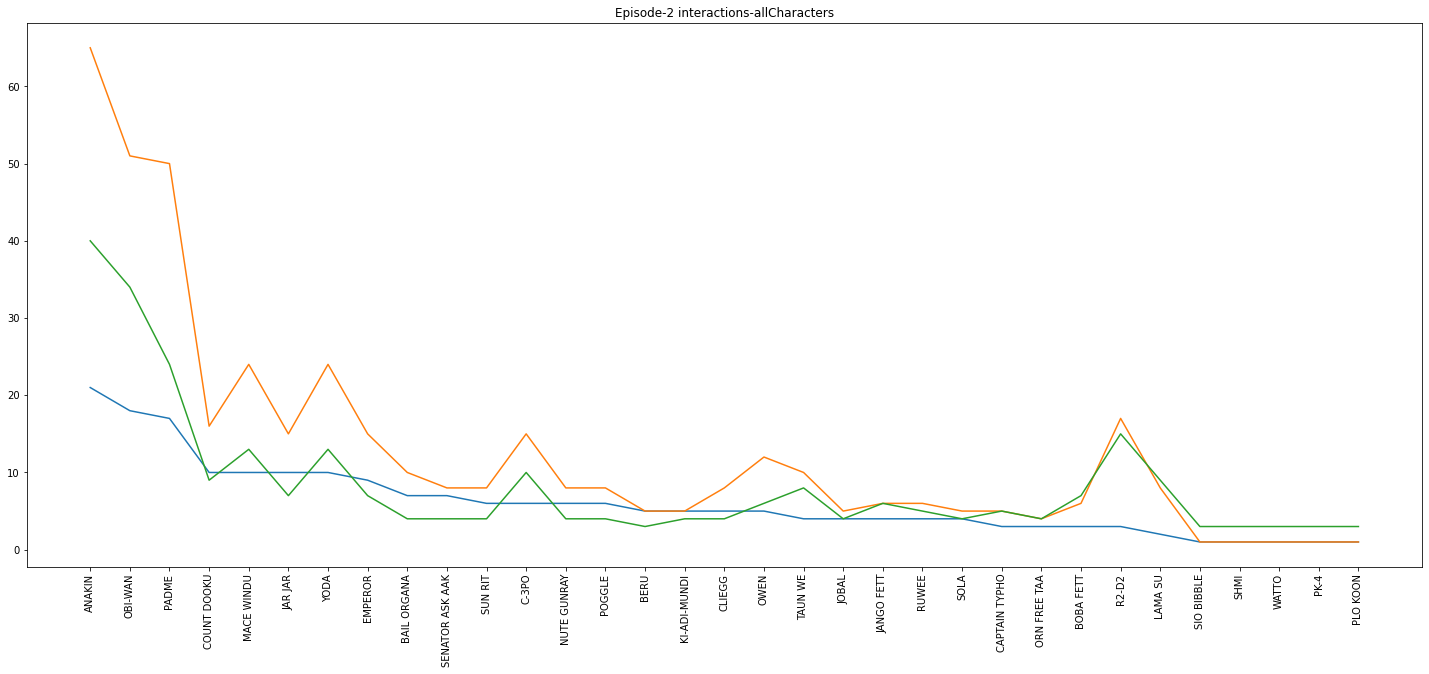


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('OBI-WAN', 0.3762150751280916), ('PADME', 0.3186734177030085), ('ANAKIN', 0.3120876460810486), ('COUNT DOOKU', 0.2947486452550695), ('MACE WINDU', 0.29341784827138667), ('YODA', 0.27158290432912796), ('TAUN WE', 0.0691292177185782), ('BOBA FETT', 0.06031813338933986), ('R2-D2', 0.04118090157233302), ('PLO KOON', 0.038354785400740075), ('WATTO', 0.035524690427404124), ('SIO BIBBLE', 0.035524690427404124)]

 Closeness Centrality

[('OBI-WAN', 0.6956521739130435), ('ANAKIN', 0.6666666666666666), ('PADME', 0.64), ('COUNT DOOKU', 0.6037735849056604), ('MACE WINDU', 0.5818181818181818), ('YODA', 0.5517241379310345), ('KI-ADI-MUNDI', 0.4155844155844156), ('WATTO', 0.4050632911392405), ('SIO BIBBLE', 0.4050632911392405), ('R2-D2', 0.3950617283950617), ('ORN FREE TAA', 0.3902439024390244), ('PLO KOON', 0.34782608695652173)]

===>List of 5 weakest nodes
SIO BIBBLE : 1
WATTO : 1
SHMI : 2
PLO KOON : 2
R2-D2 : 3

===>List of 5 strongest nod

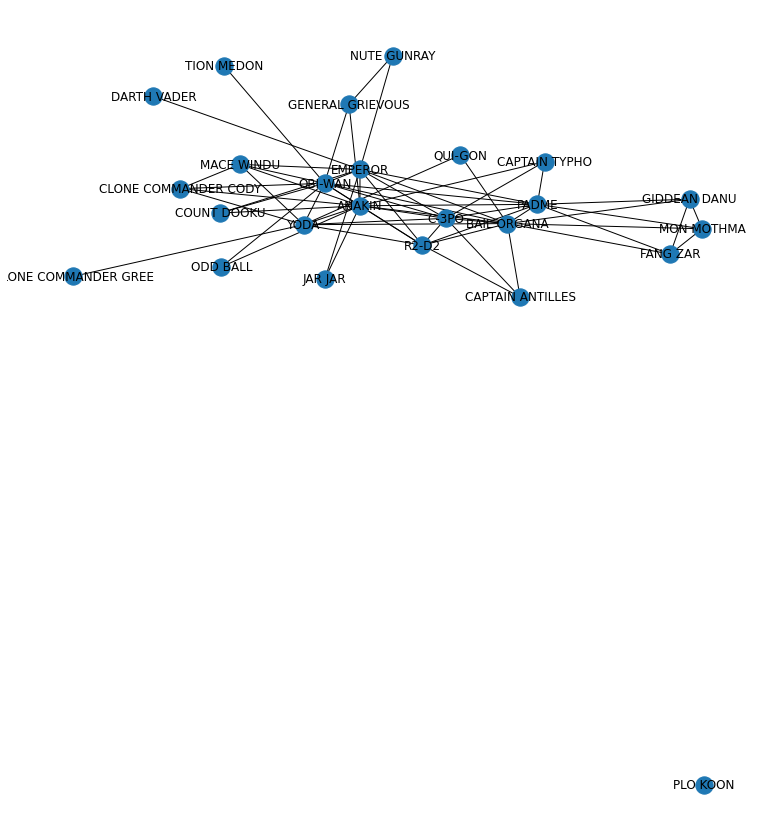

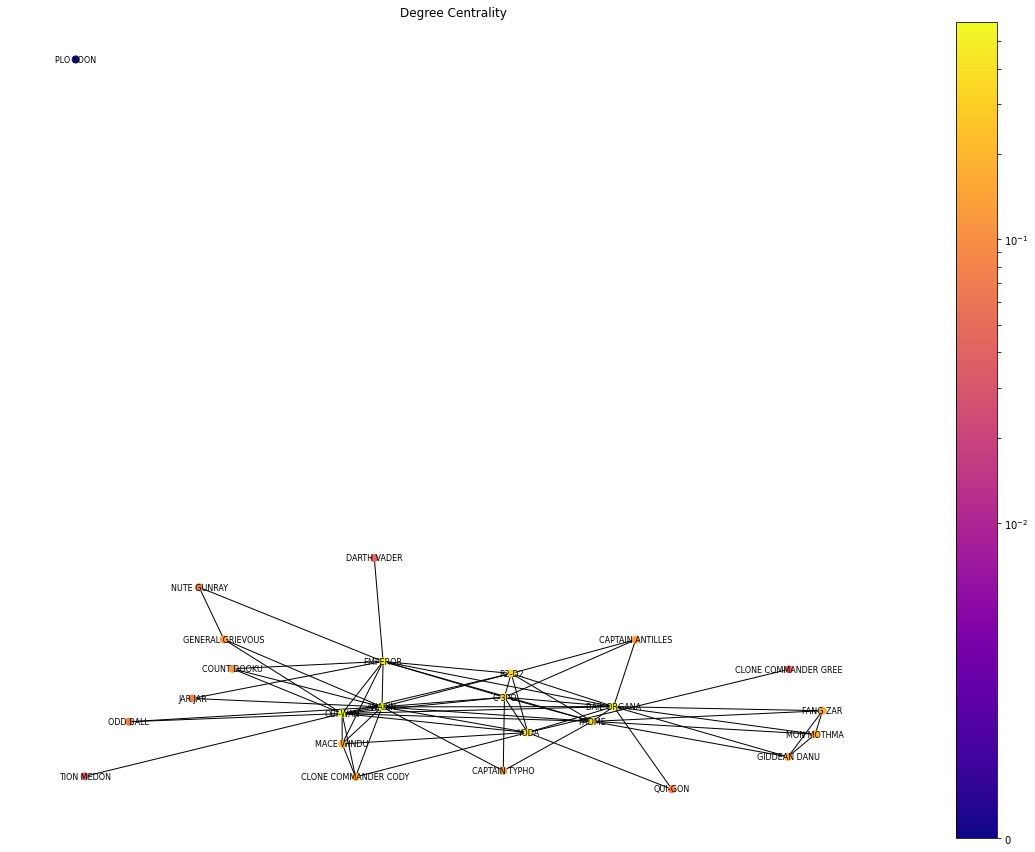

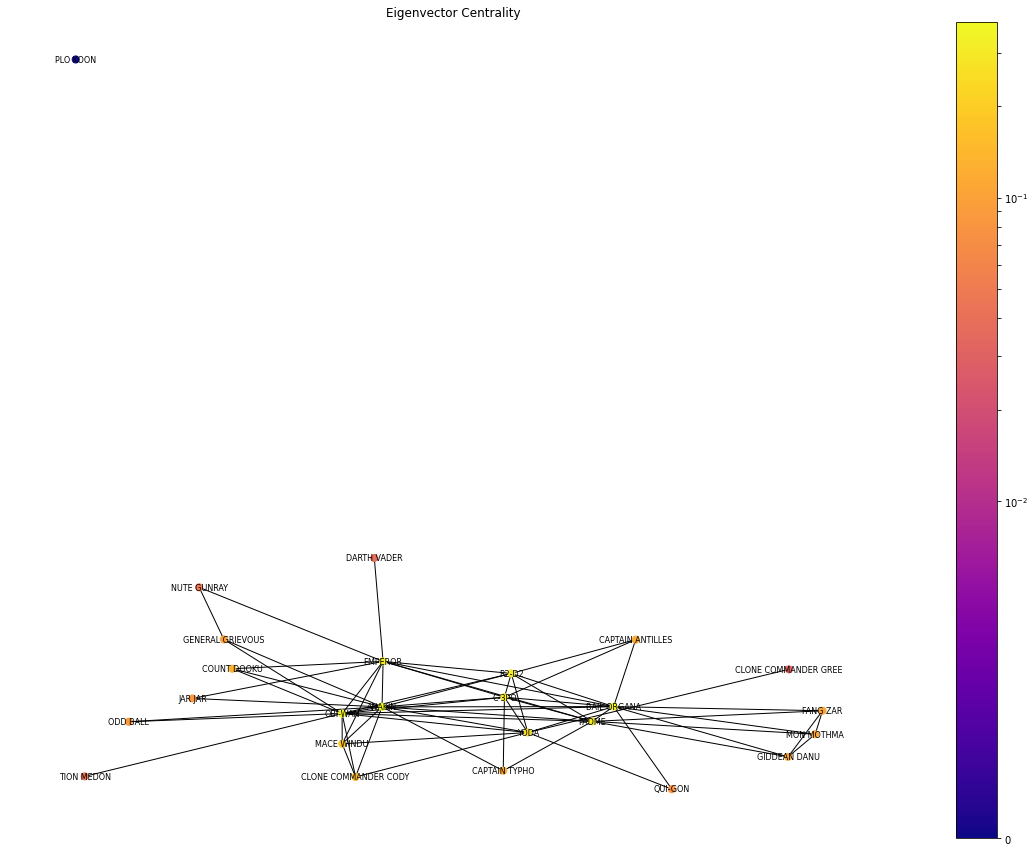

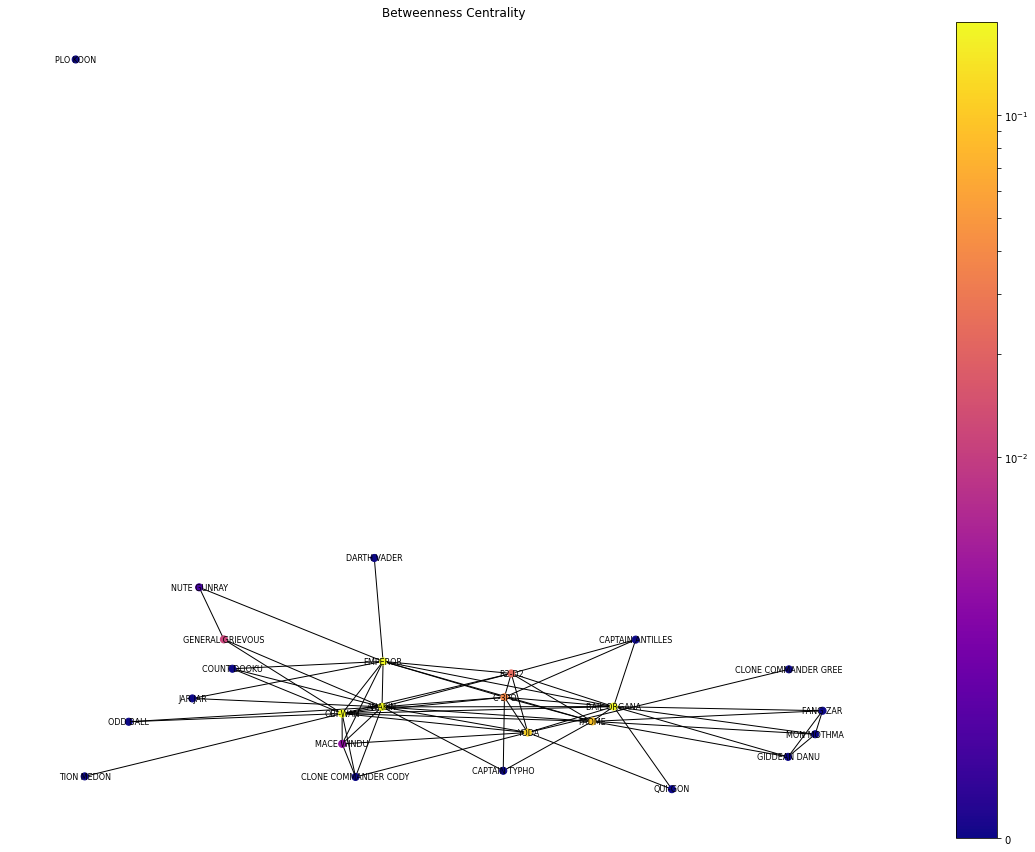

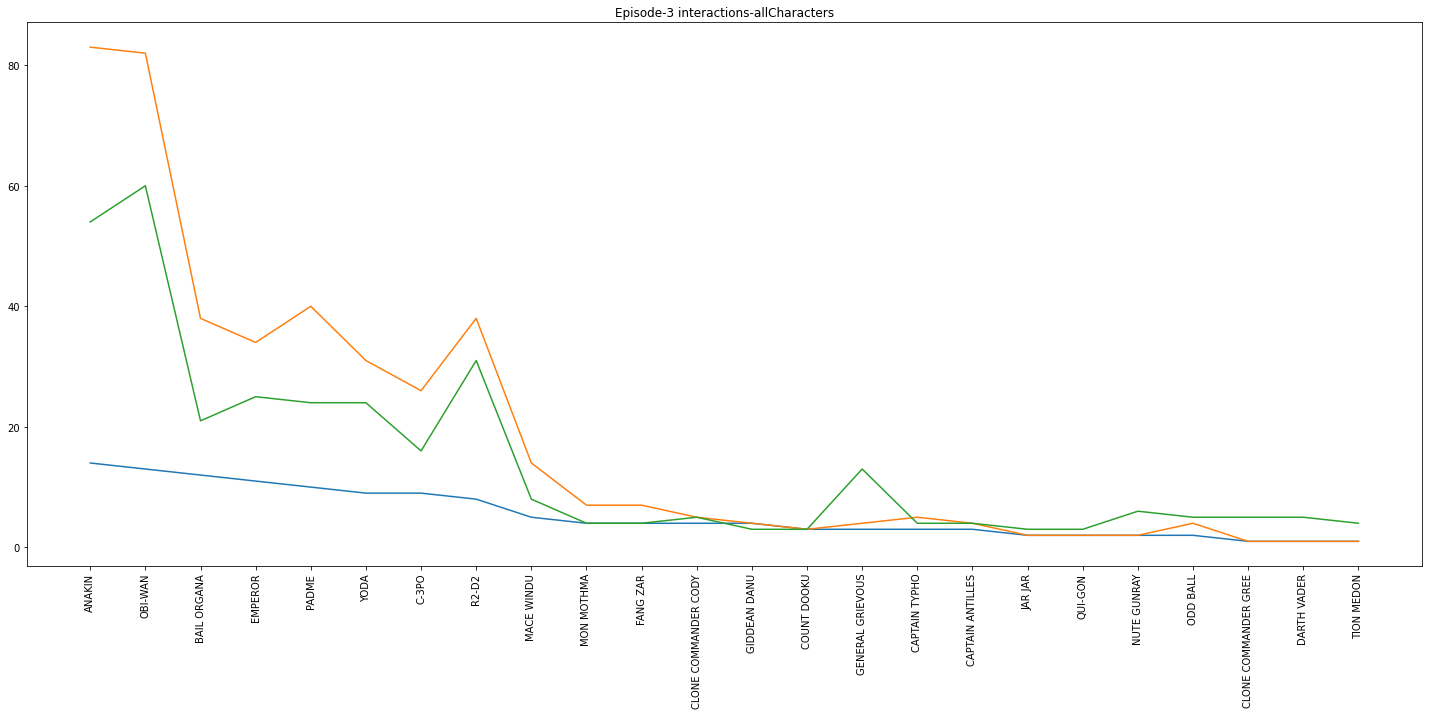


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('OBI-WAN', 0.406911698309039), ('ANAKIN', 0.39945828041713), ('EMPEROR', 0.2998260188446009), ('YODA', 0.29337828584732784), ('R2-D2', 0.28456435051644025), ('C-3PO', 0.27557905612997513), ('CLONE COMMANDER GREE', 0.06917995992503195), ('QUI-GON', 0.06899555836553914), ('FANG ZAR', 0.0657915266133031), ('TION MEDON', 0.053172154210593514), ('ODD BALL', 0.05219831606273468), ('DARTH VADER', 0.03917915058833061)]

 Closeness Centrality

[('ANAKIN', 0.71875), ('OBI-WAN', 0.6764705882352942), ('EMPEROR', 0.6571428571428571), ('BAIL ORGANA', 0.6216216216216216), ('YODA', 0.5897435897435898), ('PADME', 0.5897435897435898), ('CLONE COMMANDER GREE', 0.4423076923076923), ('GIDDEAN DANU', 0.4423076923076923), ('FANG ZAR', 0.4423076923076923), ('ODD BALL', 0.42592592592592593), ('TION MEDON', 0.4107142857142857), ('DARTH VADER', 0.40350877192982454)]

===>List of 5 weakest nodes
ODD BALL : 1
TION MEDON : 1
DARTH VADER : 1
CLONE COMMANDER 

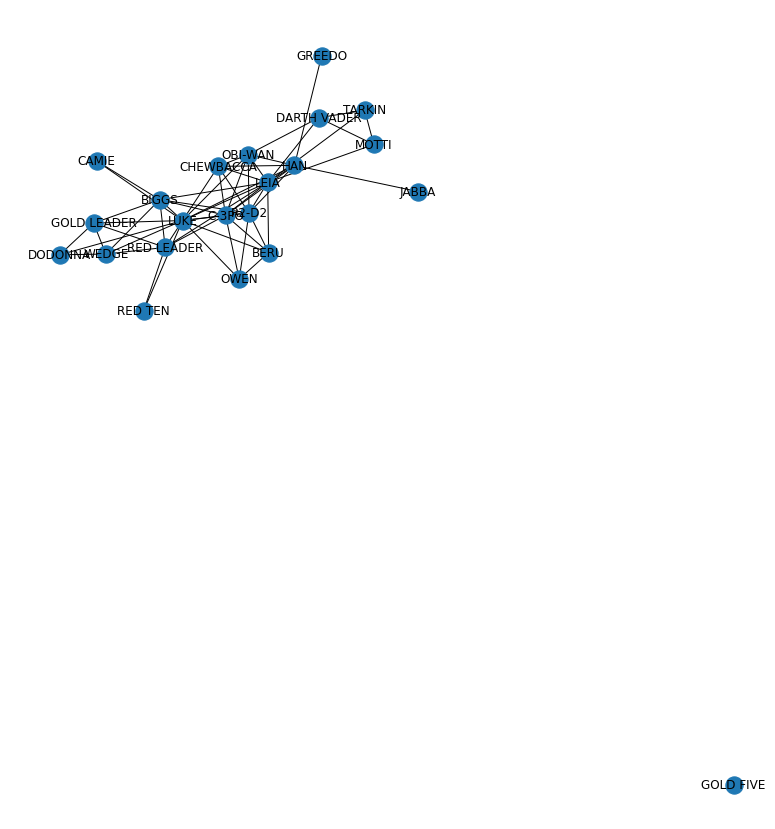

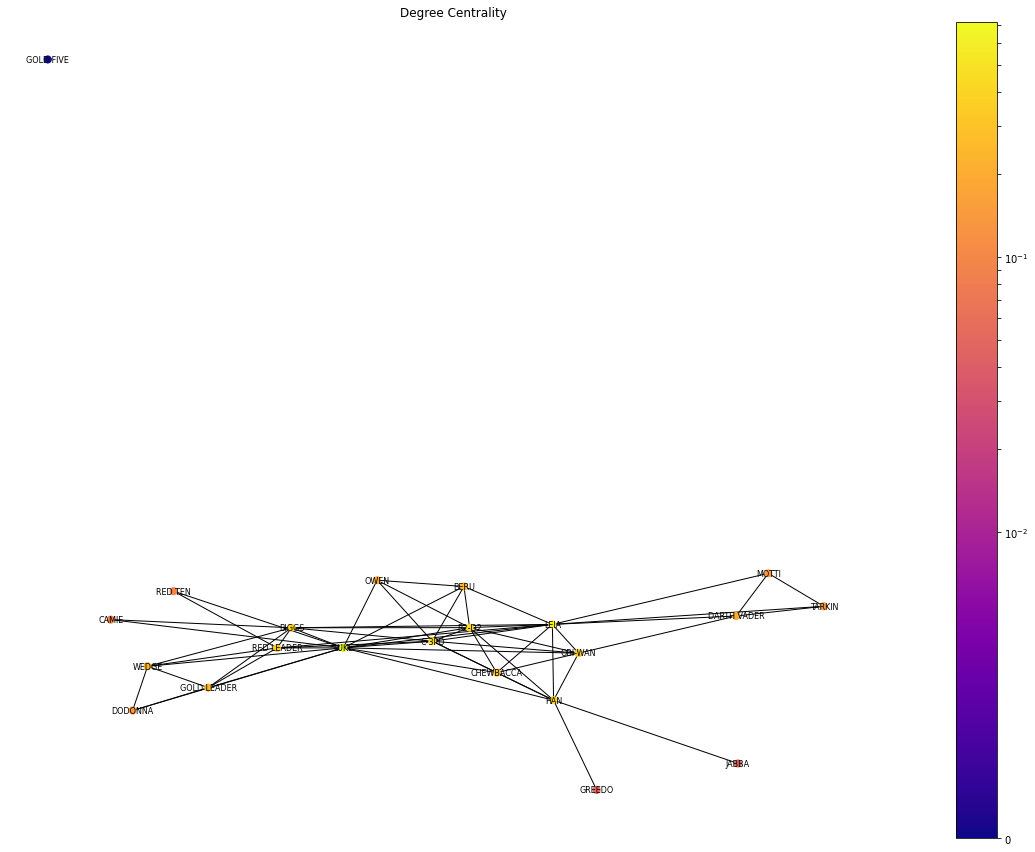

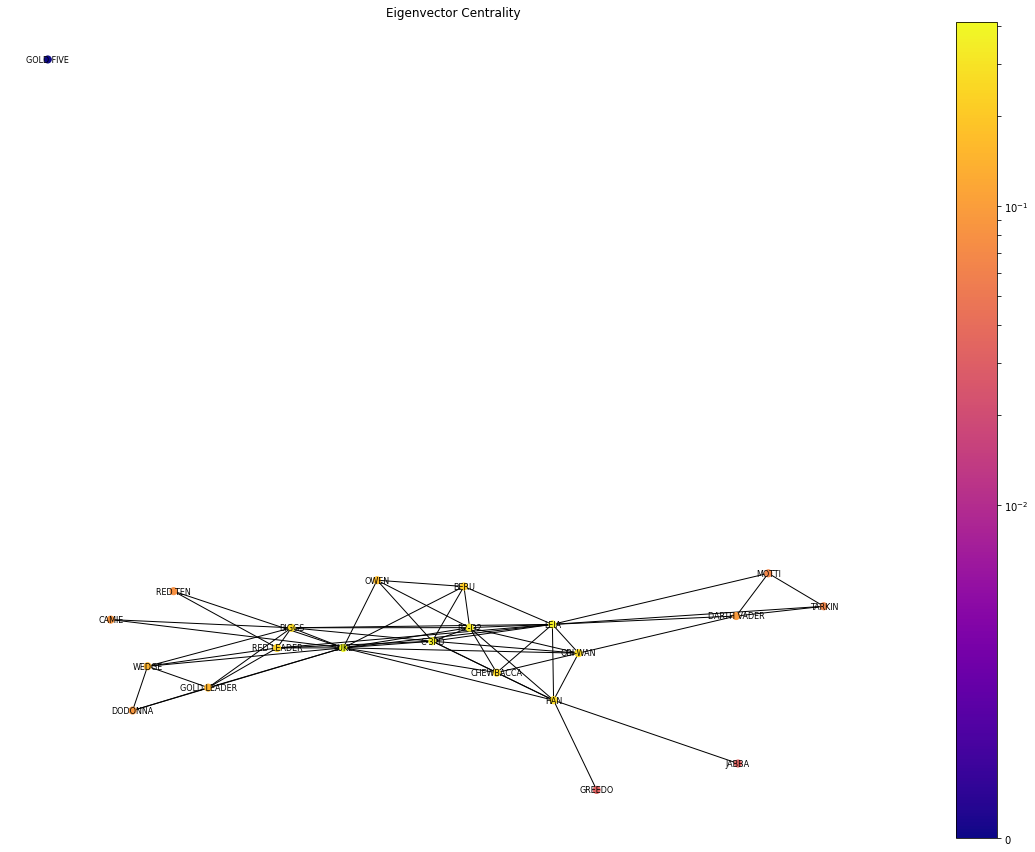

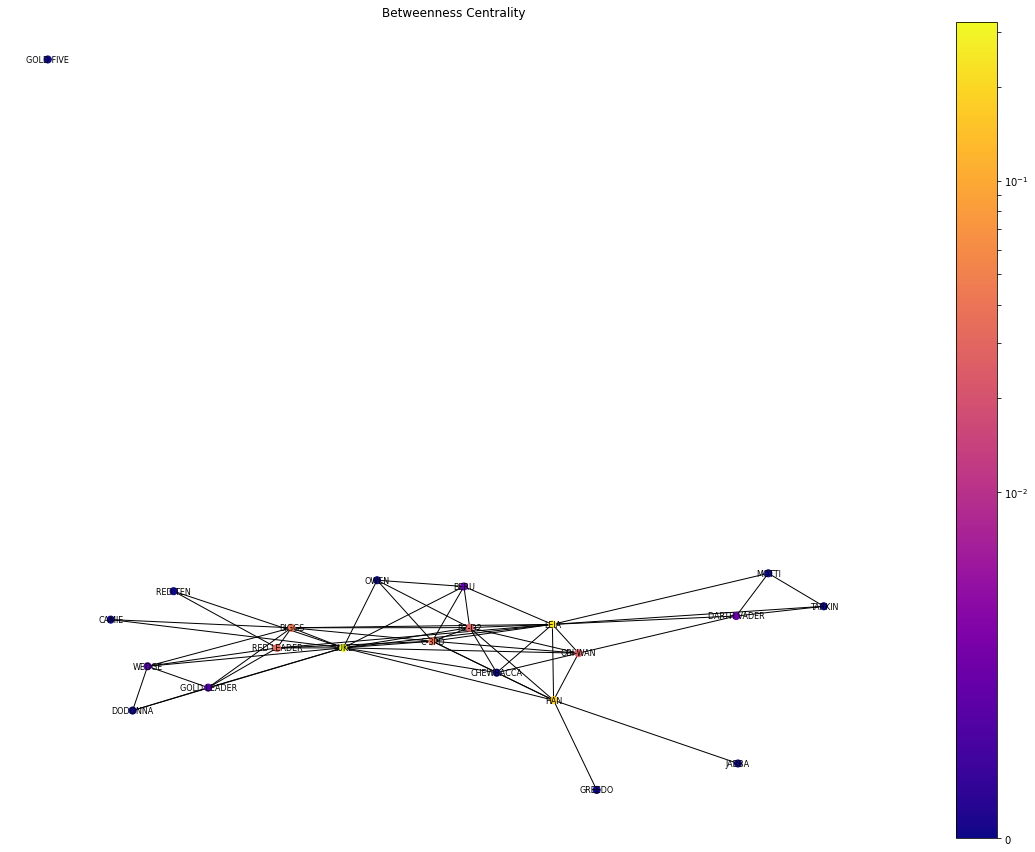

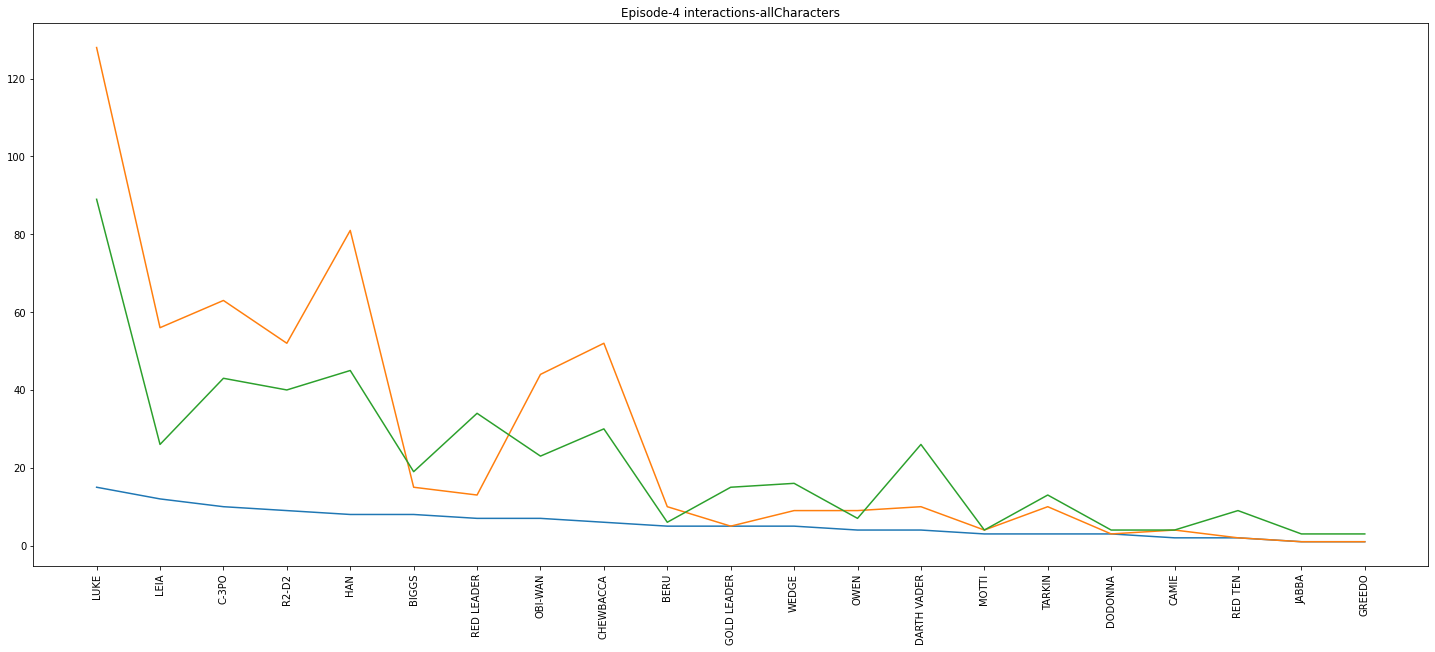


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('LUKE', 0.4073406179597241), ('C-3PO', 0.3472223453287956), ('R2-D2', 0.3382820287587611), ('LEIA', 0.3334600053356356), ('BIGGS', 0.27907966018072045), ('HAN', 0.2367439201057258), ('TARKIN', 0.13900843039947805), ('MOTTI', 0.10753635168725013), ('OWEN', 0.1037178028930023), ('RED TEN', 0.055990766494541266), ('CAMIE', 0.03836085967776463), ('JABBA', 0.032541225791750825)]

 Closeness Centrality

[('LUKE', 0.7692307692307693), ('C-3PO', 0.6666666666666666), ('R2-D2', 0.6666666666666666), ('LEIA', 0.6451612903225806), ('BIGGS', 0.6060606060606061), ('RED LEADER', 0.5714285714285714), ('DARTH VADER', 0.5), ('MOTTI', 0.46511627906976744), ('OWEN', 0.46511627906976744), ('RED TEN', 0.4444444444444444), ('CAMIE', 0.38461538461538464), ('JABBA', 0.37037037037037035)]

===>List of 5 weakest nodes
CAMIE : 1
JABBA : 1
RED TEN : 1
OWEN : 2
BERU : 4

===>List of 5 strongest nodes
LUKE : 14
R2-D2 : 10
C-3PO : 10
LEIA : 10
BIGGS : 8

 Epis

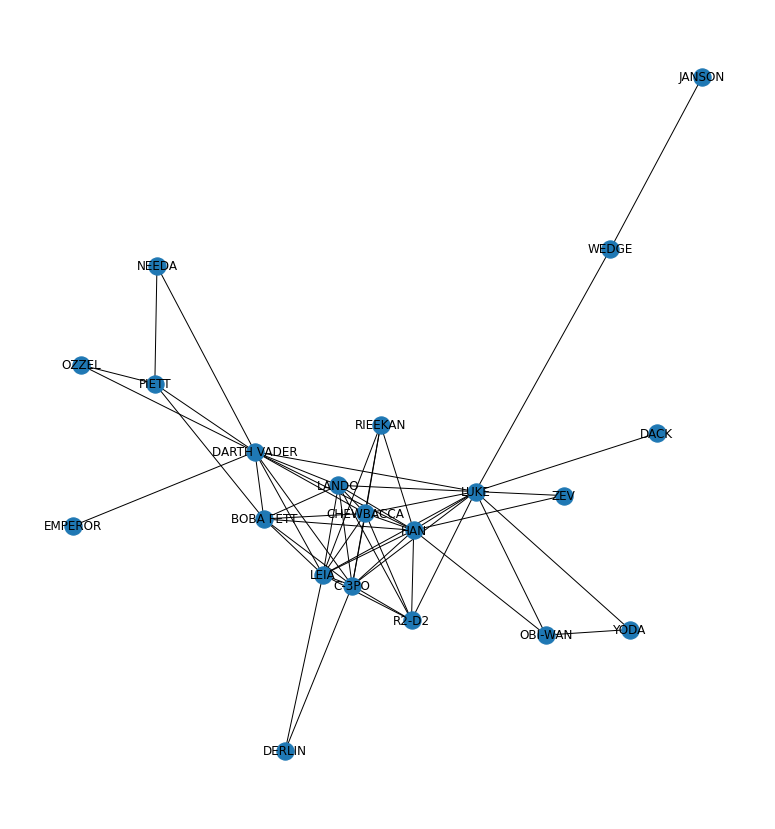

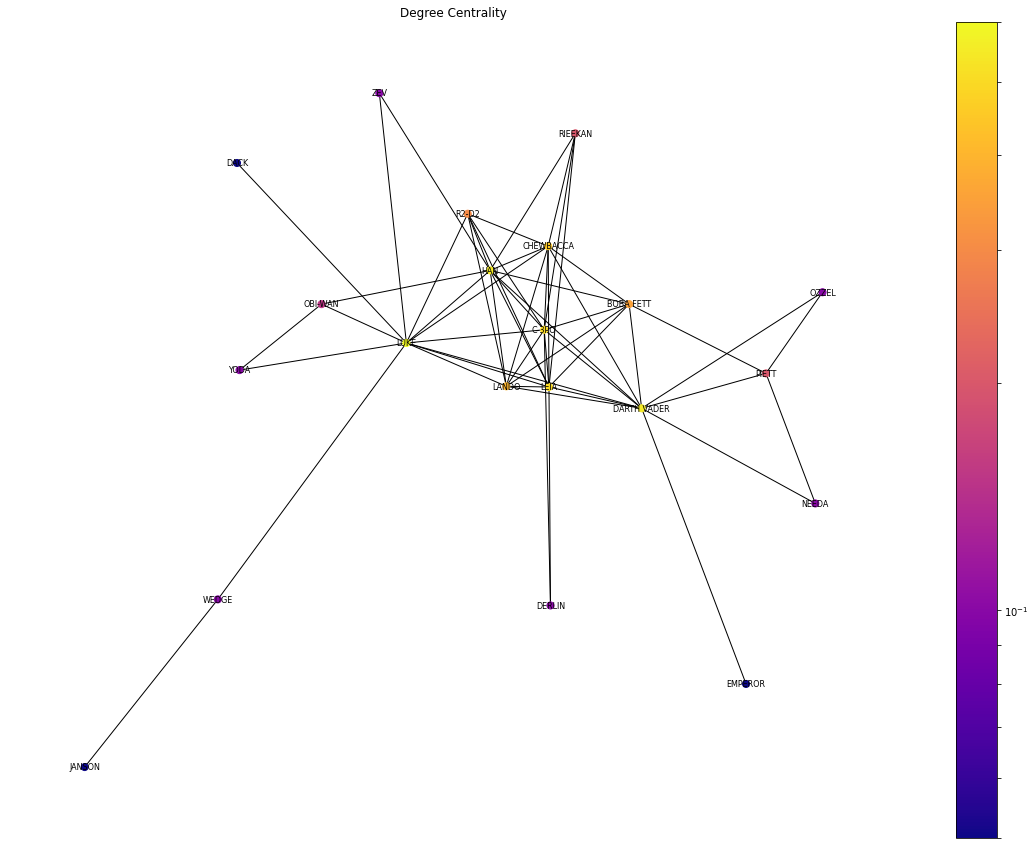

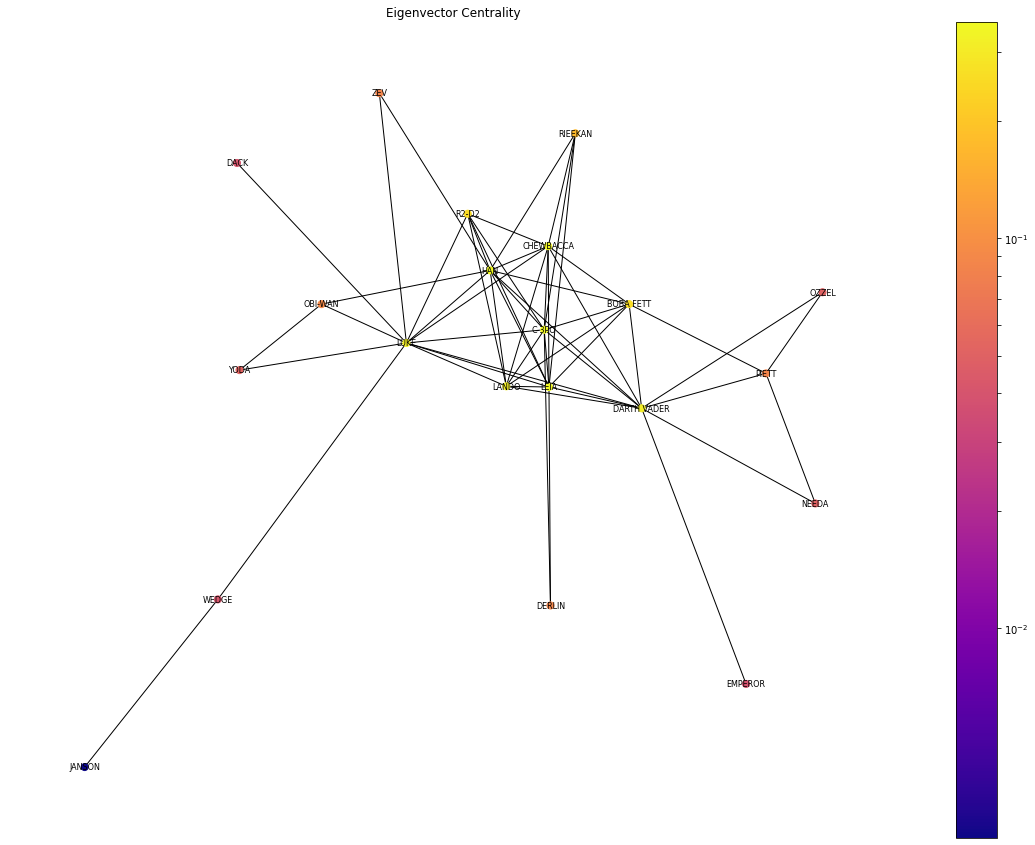

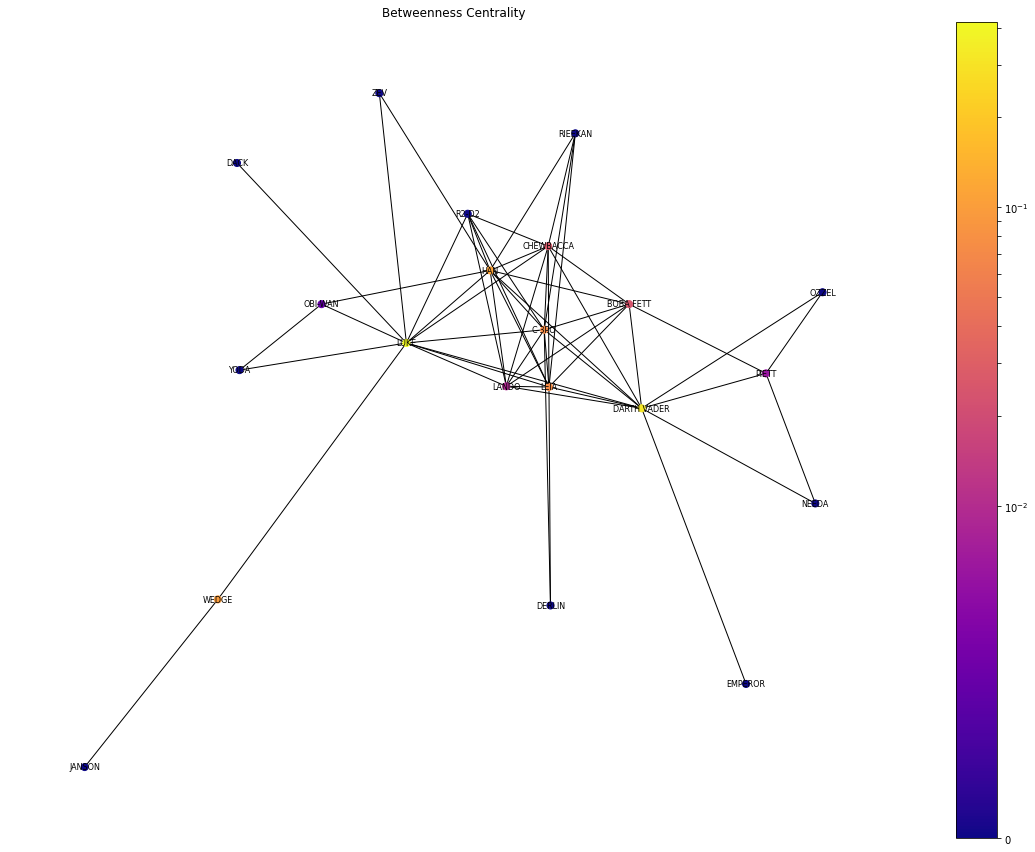

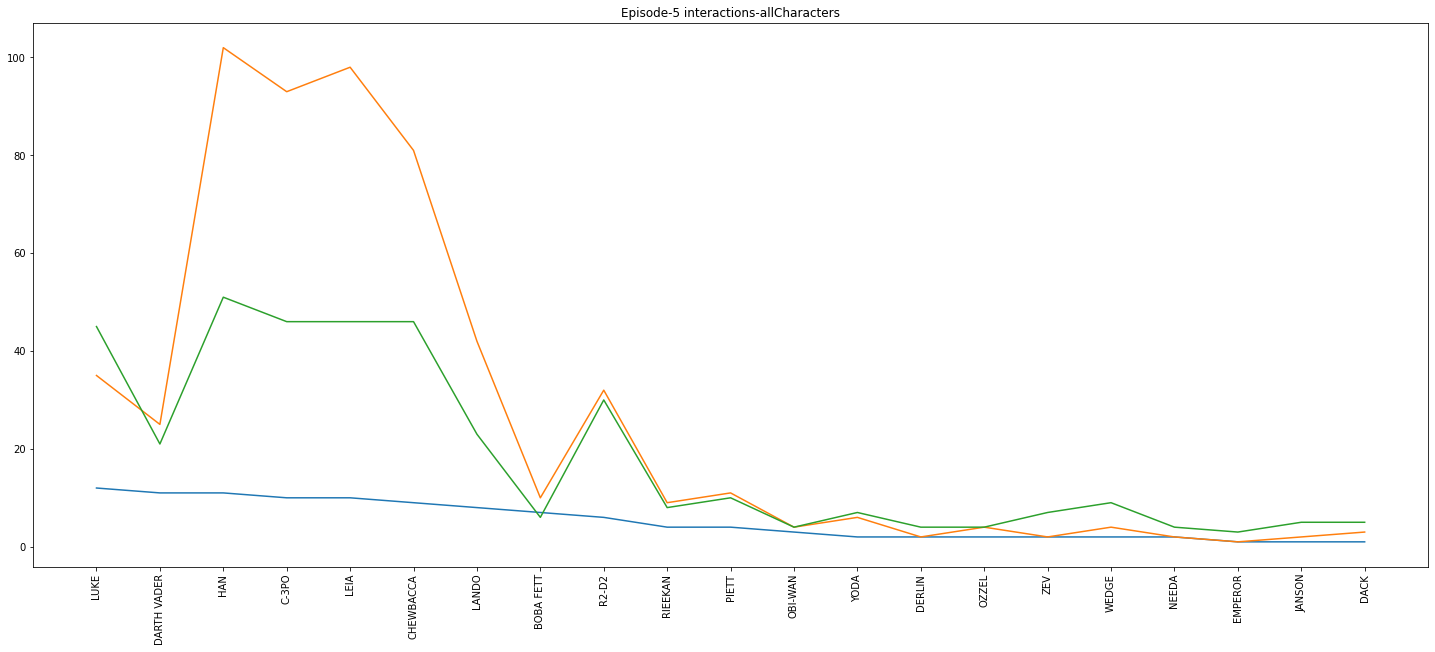


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('C-3PO', 0.37113616770809493), ('LUKE', 0.3529053298117138), ('CHEWBACCA', 0.34110737831568705), ('LANDO', 0.3406031619694671), ('DARTH VADER', 0.3386272566669945), ('BOBA FETT', 0.28333682309425773), ('DACK', 0.07972200597441344), ('JANSON', 0.0626785375842892), ('NEEDA', 0.0533407092578123), ('ZEV', 0.0533407092578123), ('DERLIN', 0.0395895607935893), ('EMPEROR', 0.034858822281894734)]

 Closeness Centrality

[('C-3PO', 0.6666666666666666), ('LUKE', 0.6666666666666666), ('DARTH VADER', 0.6451612903225806), ('LANDO', 0.625), ('CHEWBACCA', 0.625), ('HAN', 0.6060606060606061), ('DACK', 0.425531914893617), ('NEEDA', 0.4166666666666667), ('JANSON', 0.4166666666666667), ('ZEV', 0.4166666666666667), ('EMPEROR', 0.38461538461538464), ('DERLIN', 0.3508771929824561)]

===>List of 5 weakest nodes
DERLIN : 1
EMPEROR : 1
ZEV : 2
DACK : 2
JANSON : 2

===>List of 5 strongest nodes
LUKE : 11
C-3PO : 10
DARTH VADER : 10
CHEWBACCA : 9
HAN : 9


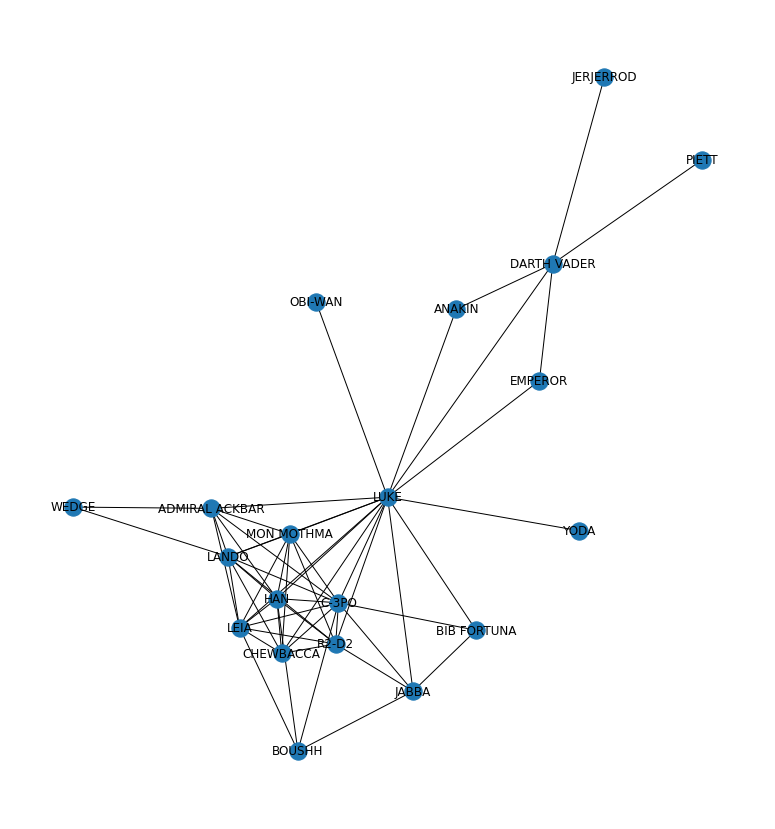

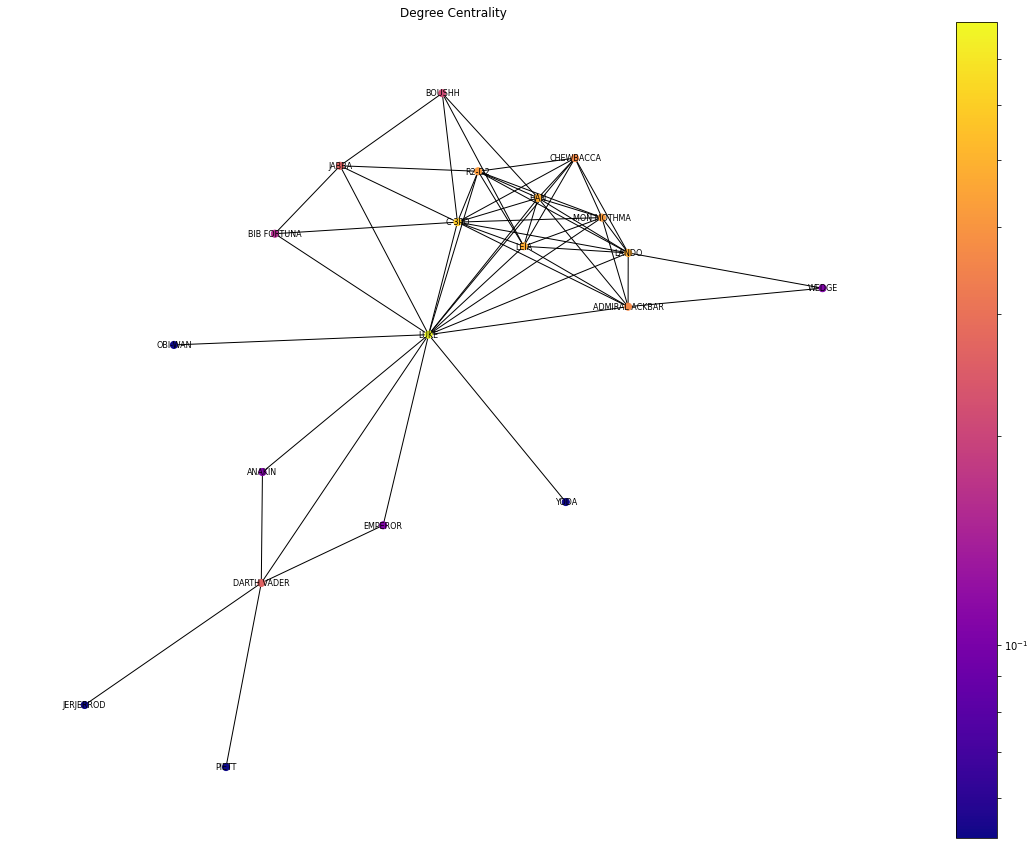

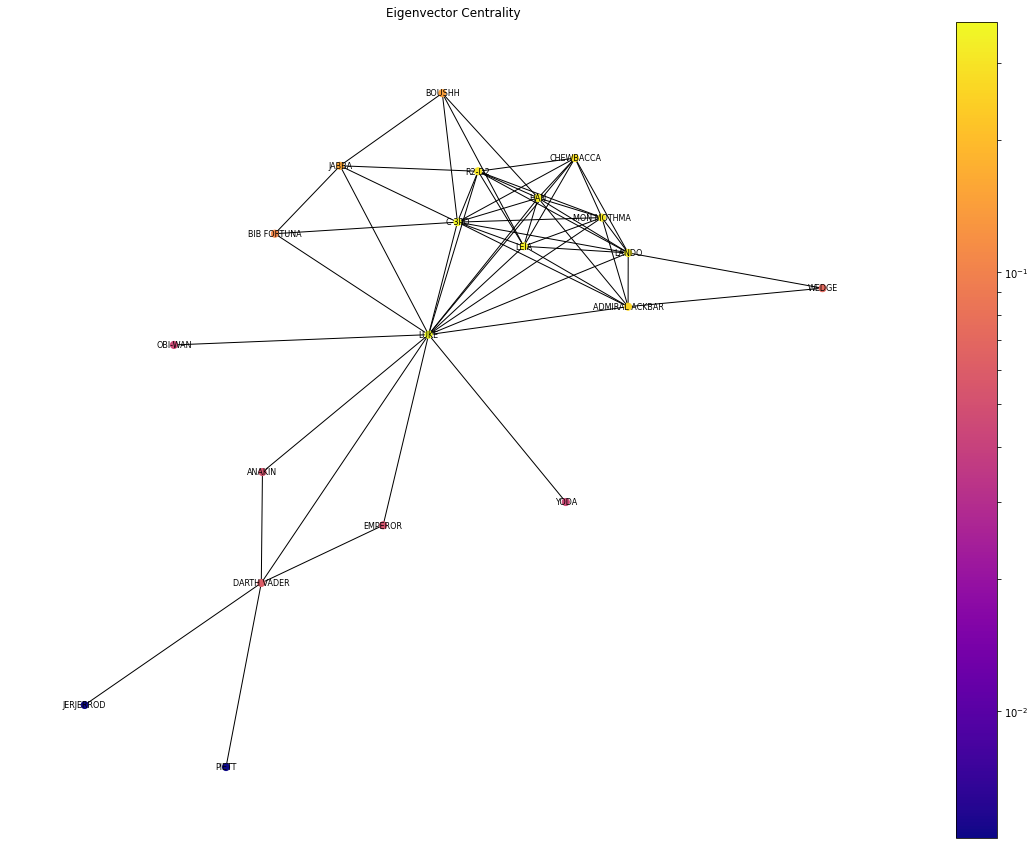

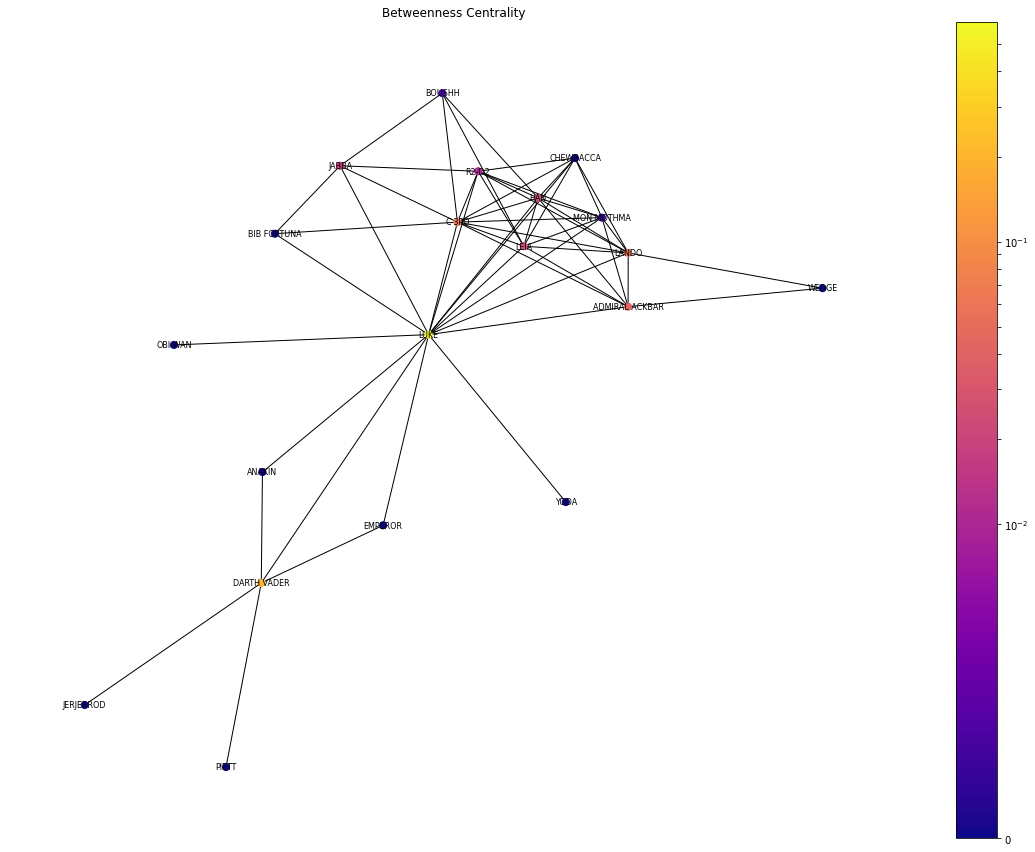

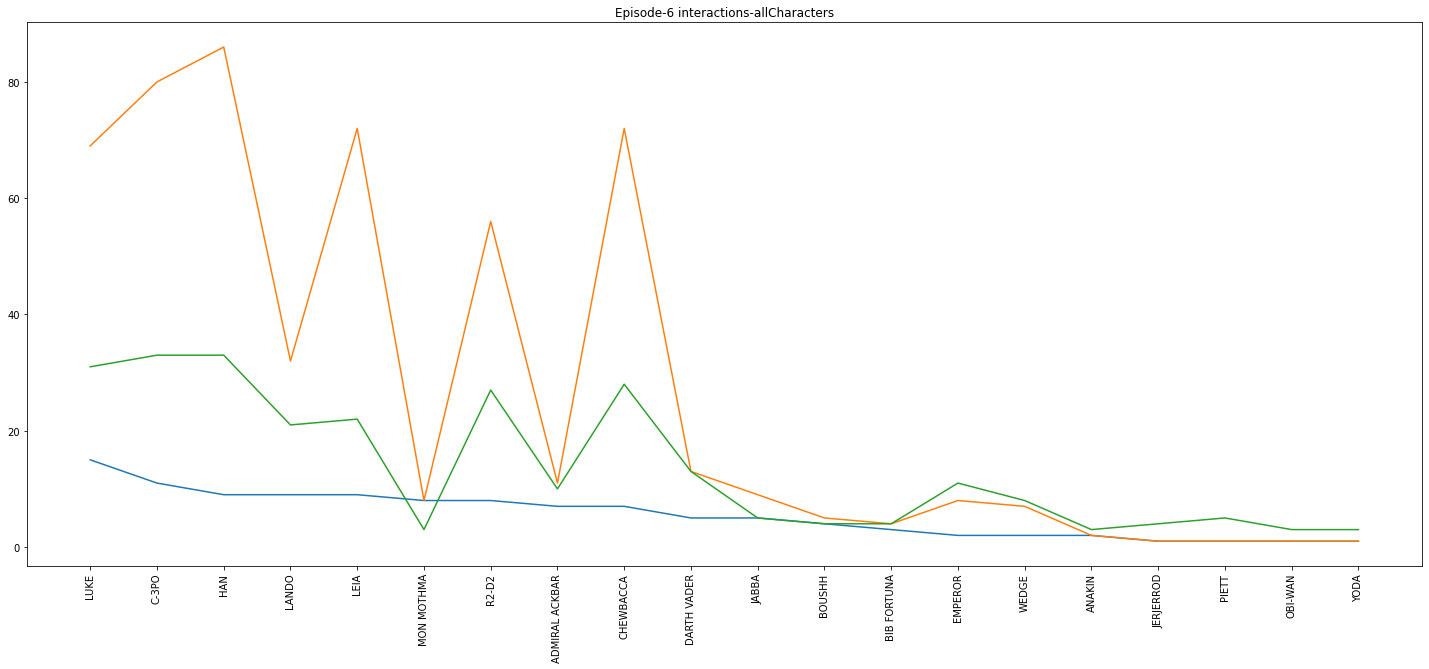


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('LUKE', 0.4164388044786157), ('R2-D2', 0.35059591602030876), ('C-3PO', 0.32905694069902053), ('HAN', 0.28771257672136663), ('LEIA', 0.27860841270327164), ('ADMIRAL ACKBAR', 0.2725570131794992), ('WEDGE', 0.11035430236857124), ('JERJERROD', 0.09480057522167643), ('BOUSHH', 0.08564440719027187), ('ANAKIN', 0.08257570400546943), ('PIETT', 0.07010269150857545), ('YODA', 0.05944220159527838)]

 Closeness Centrality

[('LUKE', 0.7916666666666666), ('C-3PO', 0.6551724137931034), ('R2-D2', 0.6551724137931034), ('LEIA', 0.6333333333333333), ('ADMIRAL ACKBAR', 0.6129032258064516), ('CHEWBACCA', 0.59375), ('ANAKIN', 0.475), ('BIB FORTUNA', 0.475), ('PIETT', 0.4523809523809524), ('YODA', 0.4523809523809524), ('BOUSHH', 0.4523809523809524), ('WEDGE', 0.4418604651162791)]

===>List of 5 weakest nodes
YODA : 1
PIETT : 2
ANAKIN : 2
JERJERROD : 3
BOUSHH : 3

===>List of 5 strongest nodes
LUKE : 14
R2-D2 : 9
C-3PO : 9
LEIA : 8
CHEWBACCA : 7

 Ep

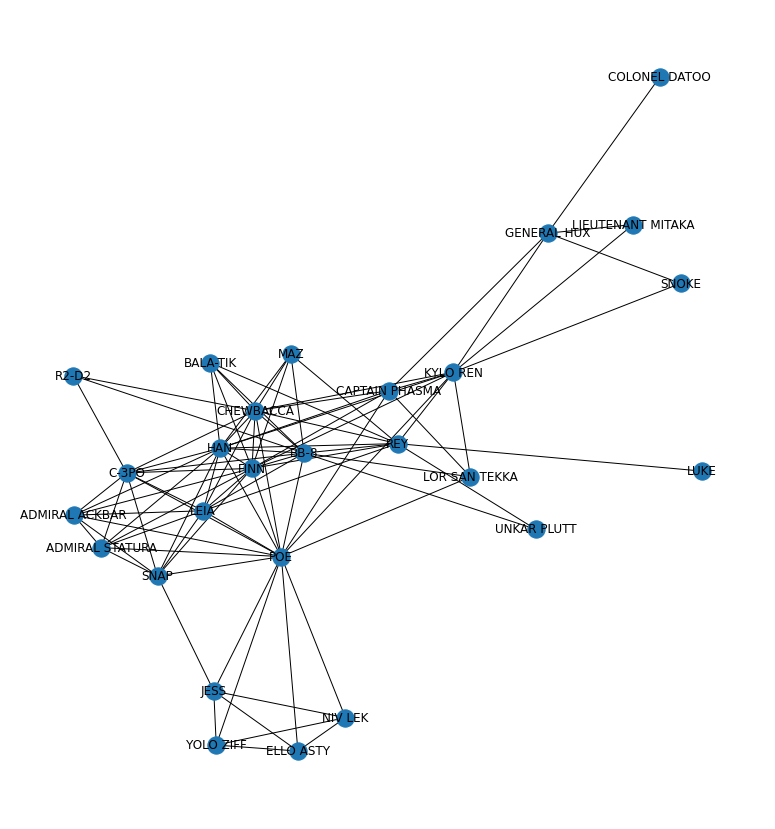

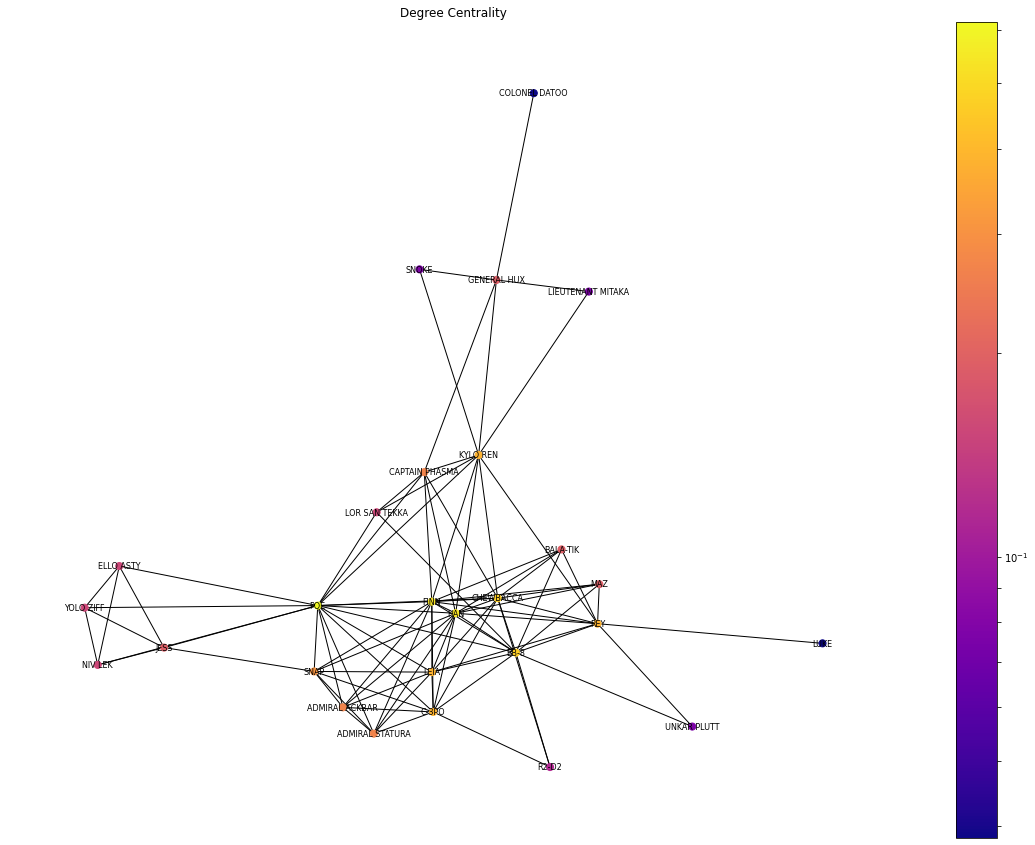

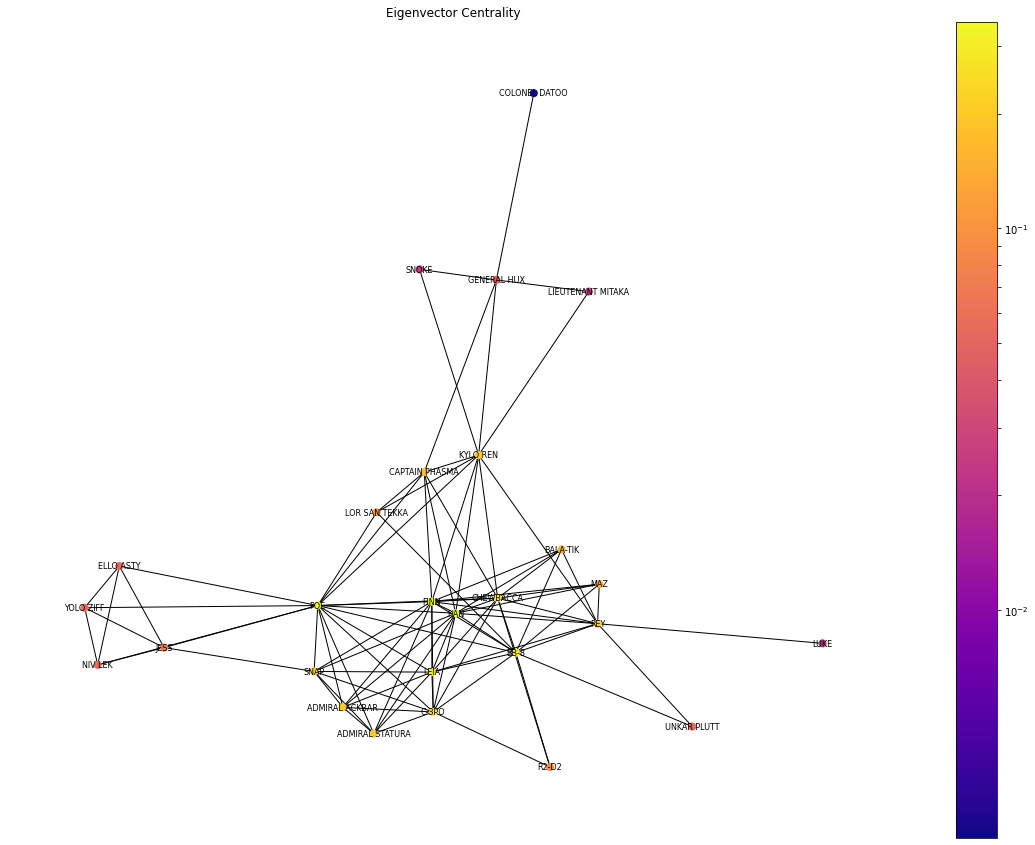

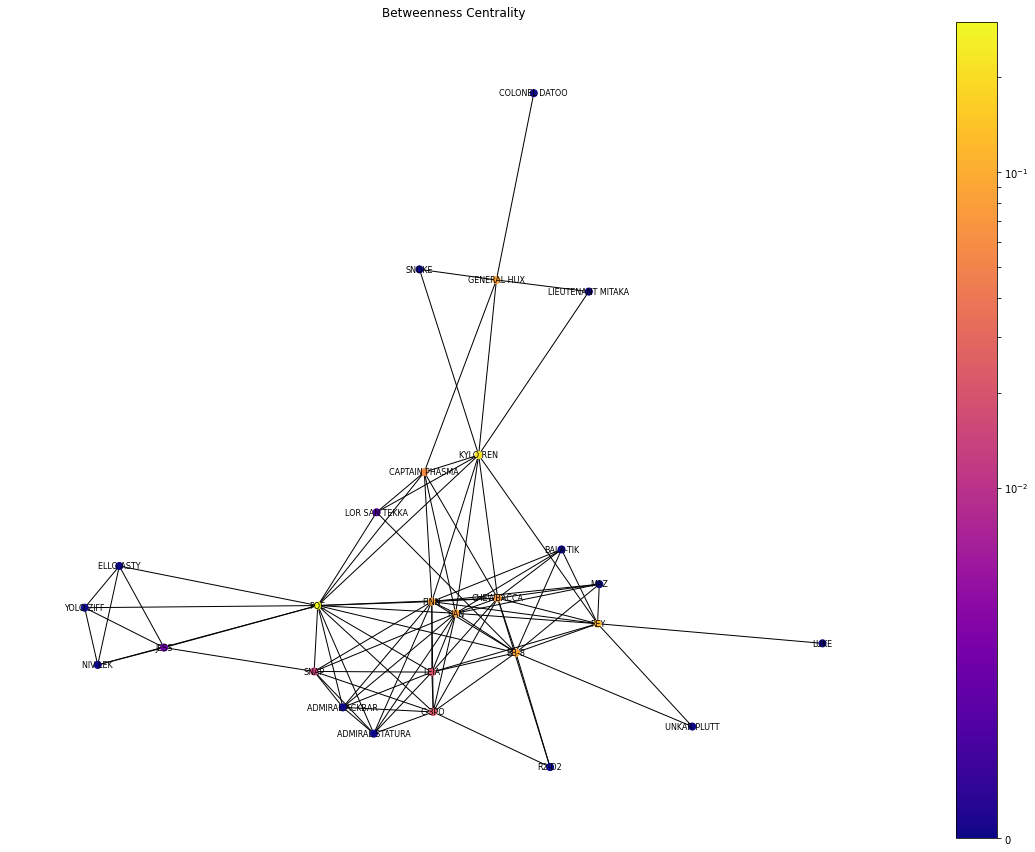

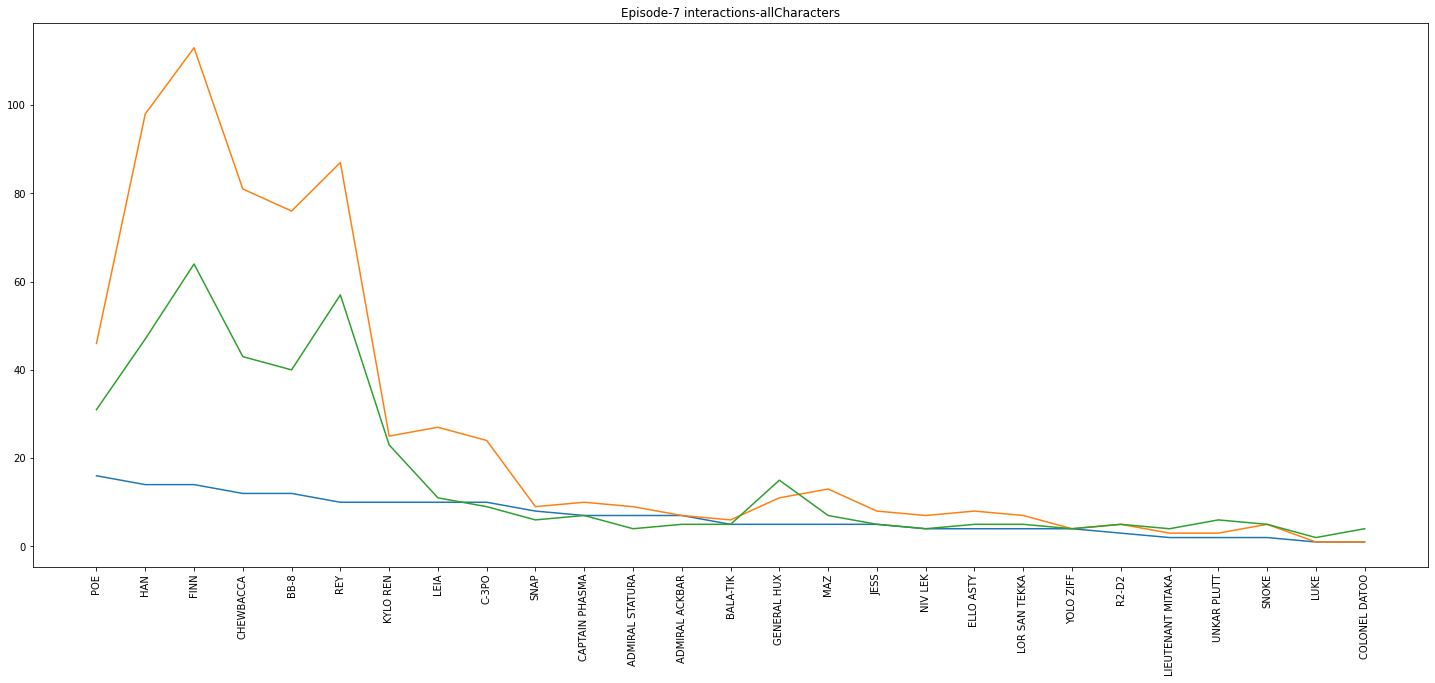


 ### Centrality Measures ###

 Eigen Vector Centrality 
[('POE', 0.33756657453142497), ('CHEWBACCA', 0.30801840231770594), ('FINN', 0.2933403244827826), ('BB-8', 0.282846603947242), ('REY', 0.2822672734376607), ('HAN', 0.25952564569987474), ('LUKE', 0.07564290712408508), ('YOLO ZIFF', 0.06650482755818556), ('ELLO ASTY', 0.060575165677572325), ('SNOKE', 0.0380756158703867), ('LIEUTENANT MITAKA', 0.0380756158703867), ('JESS', 0.033392492284969086)]

 Closeness Centrality

[('POE', 0.7222222222222222), ('CHEWBACCA', 0.6666666666666666), ('BB-8', 0.6190476190476191), ('HAN', 0.6046511627906976), ('REY', 0.6046511627906976), ('FINN', 0.5909090909090909), ('ELLO ASTY', 0.4642857142857143), ('UNKAR PLUTT', 0.4642857142857143), ('R2-D2', 0.4482758620689655), ('SNOKE', 0.4), ('LIEUTENANT MITAKA', 0.4), ('JESS', 0.37681159420289856)]

===>List of 5 weakest nodes
LIEUTENANT MITAKA : 2
SNOKE : 2
LUKE : 3
R2-D2 : 3
COLONEL DATOO : 3

===>List of 5 strongest nodes
POE : 16
CHEWBACCA : 13
FINN : 12


In [ ]:
if __name__ == "__main__":

    if not os.path.exists('task3_results'):
        os.makedirs('task3_results')
    if not os.path.exists('task4_results'):
        os.makedirs('task4_results')
        os.makedirs('task4_results/images')
        os.makedirs('task4_results/graphs')
    global episodes_homo
        
#     Define feature depending on what characteristics you wish to amalyze with
    feature = "interactions-allCharacters"
#   features = "mentions"

    # considering episode 0 as full series
    for episode in range(0,8):
        print("\n###############################################################")
        print("Episode no ",episode)
        print("###############################################################")
        hypothesis_1, hypothesis_2, task_3, task_4_and_5 = loop(episode, feature)
        print(f"\n Episode {episode} \n\n Task 1 and 2")
        print(f"\n\n Classification (correct side, wrong side) {hypothesis_1[1]}")
        print(f"\n Hypothesis 2 Analysis \n\n Betweenness \n {hypothesis_2[0]} \n\n Degree_centrality \n {hypothesis_2[1]}")        
        print(f"\n Task 3 \n\n Cliquishness \n {task_3[0]} \n\n Path_length \n {task_3[1][0]} \n \n Average Path Length when adding randomness\n {task_3[2]}")
        print(f"\n Task 4 and 5 \n\n Connections \n {task_4_and_5[0]} \n\n Interactions \n {task_4_and_5[1]}")
        #print({len(task_4_and_5[0])})
        #print({len(task_4_and_5[1])})
        #print({len(task_3[2])})
        print(f"\nTask 6 Homophily\n")
        print(episodes_homo[episode])
        print("Homophily exists")

In [ ]:
print("Homophily of all episodes: ")
k = 0
for i in episodes_homo:
  print(f"Episode {k}: {i}")
  k+=1

Homophily of all episodes: 
Episode 0: 0.47555555555555556
Episode 1: 0.5671641791044776
Episode 2: 0.62
Episode 3: 0.375
Episode 4: 0.16666666666666666
Episode 5: 0.48148148148148145
Episode 6: 0.2222222222222222
Episode 7: 0.30434782608695654
